# Stan installation

In [ ]:
# Install cmdstanpy module
!pip install cmdstanpy

# Install arviz module (With version 2.33.1 you will need a special version of arviz)
!pip install git+https://github.com/OriolAbril/arviz.git@ci

# Install cmdstan -- Just for the first time!
from cmdstanpy import install_cmdstan
install_cmdstan(compiler=True)

!pip install --upgrade arviz
!pip install --upgrade cmdstanpy

  Cloning https://github.com/OriolAbril/arviz.git (to revision ci) to /tmp/pip-req-build-pyrvieoq
  Running command git clone --filter=blob:none --quiet https://github.com/OriolAbril/arviz.git /tmp/pip-req-build-pyrvieoq
  Running command git checkout -b ci --track origin/ci
  Switched to a new branch 'ci'
  Branch 'ci' set up to track remote branch 'ci' from 'origin'.
  Resolved https://github.com/OriolAbril/arviz.git to commit 7c20182c25b0b5e9af8242d1ee4d1185ae82b70a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for arviz: filename=arviz-0.17.0.dev0-py3-none-any.whl size=1651459 sha256=b8cbf9e49ae76a13acc3edf13928f597aa24ed64971e48ab91bbc92f2f5d5184
  Stored in directory: /tmp/pip-ephem-wheel-cache-whlqmd6n/wheels/46/1e/6c/46b9c646a79d4a0f01b37df1c2c0abcc4e7129fe66e88e9b0f
Successfully built arviz
  Attempting uninstall: arviz
    Found existing installation: arviz 0.15.1
    Unin

DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.34.1
Building version cmdstan-2.34.1, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.34.1
Test model compilation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: arviz
    Found existing installation: arviz 0.17.0.dev0
    Uninstalling arviz-0.17.0.dev0:
      Successfully uninstalled arviz-0.17.0.dev0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.2.0
    Uninstalling cmdstanpy-1.2.0:
      Successfully uninstalled cmdstanpy-1.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Create ./stan folder if does not exists
if not os.path.exists("/content/drive/My Drive/Bayesian/stan"):
    os.mkdir("/content/drive/My Drive/Bayesian/stan")

# Data preparation:

Consider just the first sensor in the dataset, 3 features, rural/non rural

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Bayesian/All_values_Clean.csv')
data.head(5)

# Identify rows with '???' in any column
rows_to_remove = data[data.eq('???').any(axis=1)]

# Remove rows with '???' from the DataFrame
data = data[~data.eq('???').any(axis=1)]

# If you want to reset the index after removing rows
data.reset_index(drop=True, inplace=True)

In [ ]:
# Define the mapping dictionary
mapping = {'R': 1, 'U': 0, 'S': 0}

# Replace values in the 'area' column
data['area'] = data['area'].replace(mapping)

In [ ]:
column_names = data.columns
column_names

Index(['Unnamed: 0', 'Id_sensor', 'Time', 'NOx', 'max_wind10', 'avg_wind10',
       'max_wind100', 'avg_wind100', 'max_humidity', 'avg_humidity',
       'max_precipitation', 'avg_precipitation', 'max_temperature',
       'avg_temperature', 'min_temperature', 'k_precipitation', 'k_wind10',
       'type', 'area', 'sin12', 'cos12', 'sin6', 'cos6', 'sin4', 'cos4',
       'sin3', 'cos3', 'lat', 'lng'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,Id_sensor,Time,NOx,max_wind10,avg_wind10,max_wind100,avg_wind100,max_humidity,avg_humidity,...,sin12,cos12,sin6,cos6,sin4,cos4,sin3,cos3,lat,lng
0,7145,6204,gennaio 16,5.094537,-0.883564,-1.033000,-0.448047,-0.632854,0.614262,0.775022,...,0.500,0.866,0.866,0.5,1,0,0.866,-0.5,45.519335,9.59201
1,7146,6204,febbraio 16,4.847209,-0.160893,-0.054538,0.083888,0.459680,-0.152361,0.826117,...,0.866,0.500,0.866,-0.5,0,-1,-0.866,-0.5,45.519335,9.59201
2,7147,6204,marzo 16,3.911859,0.257496,-0.447750,0.367014,-0.273935,-0.152361,0.137046,...,1.000,0.000,0.000,-1.0,-1,0,0.000,1.0,45.519335,9.59201
3,7148,6204,aprile 16,3.763297,-0.984991,-0.200262,-0.928504,-0.113883,-1.685606,-0.319251,...,0.866,-0.500,-0.866,-0.5,0,1,0.866,-0.5,45.519335,9.59201
4,7149,6204,maggio 16,3.808000,-0.718744,-0.524298,-0.413729,-0.419238,-0.152361,-0.147897,...,0.500,-0.866,-0.866,0.5,1,0,-0.866,-0.5,45.519335,9.59201


In [ ]:
#data = data[data['Id_sensor'] == 6204]
#data.head()

In [ ]:
columns_to_keep = ['Id_sensor','Time', 'NOx', 'avg_wind10','avg_humidity','avg_precipitation','avg_temperature', 'area']

# Select only the specified columns
data = data[columns_to_keep]


In [ ]:
data.head()

,Id_sensor,Time,NOx,avg_wind10,avg_humidity,avg_precipitation,avg_temperature,area
0,6204,gennaio 16,5.094537,-1.033000,0.775022,-0.924117,-1.477609,0
1,6204,febbraio 16,4.847209,-0.054538,0.826117,0.921431,-1.064318,0
2,6204,marzo 16,3.911859,-0.447750,0.137046,-0.462942,-0.804922,0
3,6204,aprile 16,3.763297,-0.200262,-0.319251,-0.648766,-0.121794,0
4,6204,maggio 16,3.808000,-0.524298,-0.147897,1.142467,0.176097,0


In [ ]:
data.shape[0]

5076

In [ ]:
num_unique_id_sensor = data['Id_sensor'].nunique()
num_unique_id_sensor

54

In [ ]:
data.shape[0]/num_unique_id_sensor

94.0

In [ ]:
import pandas as pd

# Creazione della sequenza
t_values = [i for i in range(1, 95)] * 54

# Aggiunta della colonna al DataFrame
data['t'] = t_values

data.head()

,Id_sensor,Time,NOx,avg_wind10,avg_humidity,avg_precipitation,avg_temperature,area,t
0,6204,gennaio 16,5.094537,-1.033000,0.775022,-0.924117,-1.477609,0,1
1,6204,febbraio 16,4.847209,-0.054538,0.826117,0.921431,-1.064318,0,2
2,6204,marzo 16,3.911859,-0.447750,0.137046,-0.462942,-0.804922,0,3
3,6204,aprile 16,3.763297,-0.200262,-0.319251,-0.648766,-0.121794,0,4
4,6204,maggio 16,3.808000,-0.524298,-0.147897,1.142467,0.176097,0,5


In [ ]:
data2 = data[data['Id_sensor'] == 6204]
data2.head()

,Id_sensor,Time,NOx,avg_wind10,avg_humidity,avg_precipitation,avg_temperature,area,t
0,6204,gennaio 16,5.094537,-1.033000,0.775022,-0.924117,-1.477609,0,1
1,6204,febbraio 16,4.847209,-0.054538,0.826117,0.921431,-1.064318,0,2
2,6204,marzo 16,3.911859,-0.447750,0.137046,-0.462942,-0.804922,0,3
3,6204,aprile 16,3.763297,-0.200262,-0.319251,-0.648766,-0.121794,0,4
4,6204,maggio 16,3.808000,-0.524298,-0.147897,1.142467,0.176097,0,5


# Model 1 Frigeri

In [ ]:
model2='''

// una stazione alla volta (cioè una serie storica alla volta)

functions {

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(vector obs, vector early_rate, vector late_rate,real sigma) {

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions for log_sum_exp
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate[t] : late_rate[t], sigma);
            }
        }

        // Return the value of the lpdf
        return log_sum_exp(lp);
    }
}


data {
    // int<lower=1> N_obs_tot; // 54*94
    int<lower=1> p; //4
    //int<lower=1> N_staz; //54
    int<lower=1> N_obs; // 94
    vector[N_obs] Y_obs;
    vector[N_obs] t_obs; //1:94
    //vector [N_obs_tot] T_OBS;  //t
    //vector[N_obs] ID_obs; //unique ID_obs
    matrix[N_obs, p] X;
    vector[N_obs] r; //area
    real omega;
}
parameters {
    real<lower=0> sigma_sq;
    vector[p] betas;
    vector[2] a;
    vector[2] b;
    real c_e;
    real c_l;

    vector[2] a_r;
    vector[2] b_r;
    real c_r_e;
    real c_r_l;
}

transformed parameters {
    real<lower=0> sigma = sqrt(sigma_sq);

    vector[N_obs] ft_early;
    ft_early = rep_vector(c_e, N_obs);
    ft_early += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_early += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_early;
    ft_r_early = rep_vector(c_r_e, N_obs);
    ft_r_early += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_early += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_late;
    ft_late = rep_vector(c_l, N_obs);
    ft_late += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_late += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_late;
    ft_r_late = rep_vector(c_r_l, N_obs);
    ft_r_late += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_late += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);


    vector[N_obs] mu_obs_early;
    mu_obs_early[1:N_obs] = r[1:N_obs] .* ft_r_early[1:N_obs] + (1 - r[1:N_obs]) .* ft_early[1:N_obs];
    mu_obs_early[1:N_obs] += X[1:N_obs] * betas;

    vector[N_obs] mu_obs_late;
    mu_obs_late[1:N_obs] = r[1:N_obs] .* ft_r_late[1:N_obs] + (1 - r[1:N_obs]) .* ft_late[1:N_obs];
    mu_obs_late[1:N_obs] += X[1:N_obs] * betas;

}

model {
    sigma_sq ~ inv_gamma(3, 2);
    betas ~ normal(0, 2);
    a ~ normal(0, 1);
    b ~ normal(0, 1);
    c_e ~ normal(0, 1);
    a_r ~ normal(0, 1);
    b_r ~ normal(0, 1);
    c_l ~ normal(0, 1);
    c_r_e ~ normal(0, 1);
    c_r_l ~ normal(0, 1);


    target += marginal_likelihood_logpdf(Y_obs, mu_obs_early, mu_obs_late, sigma);
}




'''


# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/model2.stan"
with open(stan_file, "w") as f:
    print(model2, file=f)

# Compile stan model
model2 = CmdStanModel(stan_file=stan_file)

18:08:46 - cmdstanpy - INFO - compiling stan file /tmp/tmpv3r5r0ty/tmpe3_u82oj.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
INFO:cmdstanpy:compiling stan file /tmp/tmpv3r5r0ty/tmpe3_u82oj.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model2.stan /tmp/tmpv3r5r0ty/tmpe3_u82oj
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model2.stan --o=/tmp/tmpv3r5r0ty/tmpe3_u82oj.hpp /tmp/tmpv3r5r0ty/tmpe3_u82oj.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundial

In [ ]:
# Input data
cpc_data = {
    "N_obs": data2.shape[0],
    "p": 4,
    "Y_obs" : data2.NOx,
    "t_obs" : data2.t,
    "X" : data2.iloc[:, 3:7],
    "r": data2.area,
    "omega" : 2*3.14/12,
    "month": data2.t
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/i8fy68b6.json
18:09:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=2806', 'data', 'file=/tmp/tmpuer4ldls/i8fy68b6.json', 'output', 'file=/tmp/tmpuer4ldls/model2h917oqss/model2-20240207180926_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=2806', 'data', 'file=/tmp/tmpuer4ldls/i8fy68b6.json', 'output', 'file=/tmp/tmpuer4ldls/model2h917oqss/model2-20240207180926_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=2806', 'data', 'file=/tmp/t

18:16:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=2806', 'data', 'file=/tmp/tmpuer4ldls/i8fy68b6.json', 'output', 'file=/tmp/tmpuer4ldls/model2h917oqss/model2-20240207180926_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model2h917oqss/model2-20240207180926_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model2h917oqss/model2-20240207180926_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

In [ ]:
# Convert to arviz data type
chains = az.from_cmdstanpy(cpc_fit)

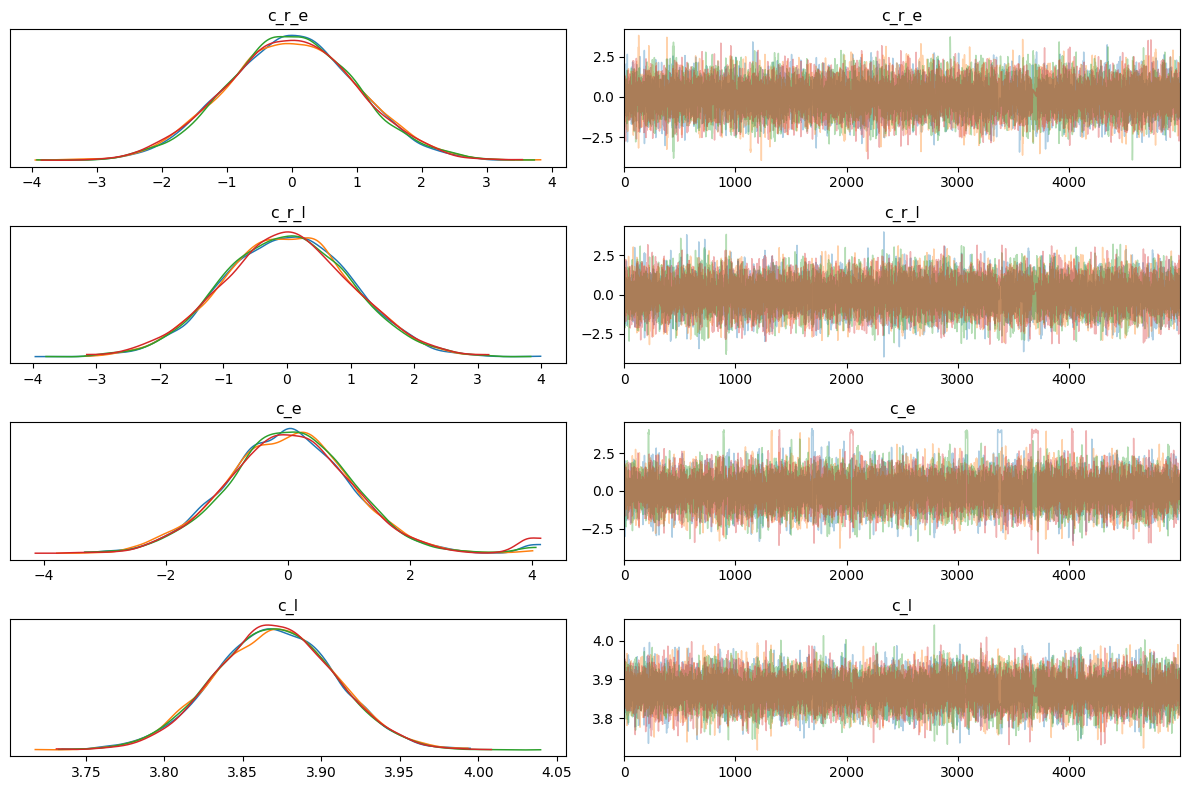

In [ ]:
# Traceplots
az.plot_trace(chains, var_names=["c_r_e", "c_r_l", "c_e", "c_l"], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
# Summary of the MCMC run
az.summary(chains)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma_sq,0.115,0.017,0.085,0.149,0.000,0.000,28018.0,14807.0,1.0
betas[0],-0.075,0.082,-0.231,0.079,0.001,0.000,14885.0,7340.0,1.0
betas[1],0.156,0.077,0.011,0.299,0.001,0.001,10321.0,6088.0,1.0
betas[2],-0.096,0.057,-0.203,0.011,0.000,0.000,15943.0,14777.0,1.0
betas[3],-0.240,0.188,-0.586,0.122,0.002,0.001,10073.0,12618.0,1.0
...,...,...,...,...,...,...,...,...,...
mu_obs_late[89],3.181,0.088,3.016,3.346,0.001,0.000,22044.0,10850.0,1.0
mu_obs_late[90],3.096,0.088,2.933,3.264,0.001,0.000,20278.0,12442.0,1.0
mu_obs_late[91],3.000,0.098,2.818,3.186,0.001,0.000,20511.0,9084.0,1.0
mu_obs_late[92],3.654,0.087,3.489,3.815,0.001,0.000,23548.0,16545.0,1.0


In [ ]:
model2='''

// una stazione alla volta (cioè una serie storica alla volta)

functions {

    // Computes the marginal likelihood lpdf  vector compute_logp
    vector compute_logp(vector obs, vector early_rate, vector late_rate,real sigma) {

        // Deduce size of data and uniform contribution
        int T = size(obs);
        real log_unif = -log(T);

        // Compute contributions for log_sum_exp
        vector[T] lp = rep_vector(log_unif, T);
        for (s in 1:T) {
            for (t in 1:T) {
                lp[s] += normal_lpdf(obs[t] | t < s ? early_rate[t] : late_rate[t], sigma);
            }
        }

        // Return the value of the lpdf
        return lp;
    }

    // Computes the vector of probabilites for the posterior distribution of s vector compute_probs(vector lp)
    vector compute_probs(vector lp) {
        return softmax(lp);
    }

    // Computes the marginal likelihood lpdf
    real marginal_likelihood_logpdf(vector lp){
        return log_sum_exp(lp);
    }
}


data {
    // int<lower=1> N_obs_tot; // 54*94
    int<lower=1> p; //4
    //int<lower=1> N_staz; //54
    int<lower=1> N_obs; // 94
    vector[N_obs] Y_obs;
    vector[N_obs] t_obs; //1:94
    //vector [N_obs_tot] T_OBS;  //t
    //vector[N_obs] ID_obs; //unique ID_obs
    matrix[N_obs, p] X;
    vector[N_obs] r; //area
    real omega;
}
parameters {
    real<lower=0> sigma_sq;
    vector[p] betas;
    vector[2] a;
    vector[2] b;
    real c_e;
    real c_l;

    vector[2] a_r;
    vector[2] b_r;
    real c_r_e;
    real c_r_l;
}

transformed parameters {
    real<lower=0> sigma = sqrt(sigma_sq);

    vector[N_obs] ft_early;
    ft_early = rep_vector(c_e, N_obs);
    ft_early += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_early += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_early;
    ft_r_early = rep_vector(c_r_e, N_obs);
    ft_r_early += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_early += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_late;
    ft_late = rep_vector(c_l, N_obs);
    ft_late += a[1] * sin(omega * t_obs) + b[1] * cos(omega * t_obs);
    ft_late += a[2] * sin(4 * omega * t_obs) + b[2] * cos(4 * omega * t_obs);

    vector[N_obs] ft_r_late;
    ft_r_late = rep_vector(c_r_l, N_obs);
    ft_r_late += a_r[1] * sin(omega * t_obs) + b_r[1] * cos(omega * t_obs);
    ft_r_late += a_r[2] * sin(4 * omega * t_obs) + b_r[2] * cos(4 * omega * t_obs);


    vector[N_obs] mu_obs_early;
    mu_obs_early[1:N_obs] = r[1:N_obs] .* ft_r_early[1:N_obs] + (1 - r[1:N_obs]) .* ft_early[1:N_obs];
    mu_obs_early[1:N_obs] += X[1:N_obs] * betas;

    vector[N_obs] mu_obs_late;
    mu_obs_late[1:N_obs] = r[1:N_obs] .* ft_r_late[1:N_obs] + (1 - r[1:N_obs]) .* ft_late[1:N_obs];
    mu_obs_late[1:N_obs] += X[1:N_obs] * betas;

}

model {
    sigma_sq ~ inv_gamma(3, 2);
    betas ~ normal(0, 2);
    a ~ normal(0, 1);
    b ~ normal(0, 1);
    c_e ~ normal(0, 1);
    a_r ~ normal(0, 1);
    b_r ~ normal(0, 1);
    c_l ~ normal(0, 1);
    c_r_e ~ normal(0, 1);
    c_r_l ~ normal(0, 1);


    target += marginal_likelihood_logpdf(compute_logp(Y_obs, mu_obs_early, mu_obs_late, sigma)); //target += marginal_likelihood_logpdf(compute_logp(y, e, l, sigma));
}

generated quantities {
    int<lower=1, upper=N_obs> s = categorical_rng(compute_probs(compute_logp(Y_obs, mu_obs_early, mu_obs_late, sigma))); //compute_probs(compute_logp(y,e,l, sigma)))
}



'''


# Write stan model to file
stan_file = "/content/drive/My Drive/Bayesian/stan/model2.stan"
with open(stan_file, "w") as f:
    print(model2, file=f)

# Compile stan model
model2 = CmdStanModel(stan_file=stan_file)

19:59:06 - cmdstanpy - INFO - compiling stan file /tmp/tmpvt6k2svj/tmp90rkz3ks.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
INFO:cmdstanpy:compiling stan file /tmp/tmpvt6k2svj/tmp90rkz3ks.stan to exe file /content/drive/My Drive/Bayesian/stan/model2
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model2.stan /tmp/tmpvt6k2svj/tmp90rkz3ks
cwd: /root/.cmdstan/cmdstan-2.34.1
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model2.stan --o=/tmp/tmpvt6k2svj/tmp90rkz3ks.hpp /tmp/tmpvt6k2svj/tmp90rkz3ks.stan

--- Compiling C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.81.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundial

In [ ]:
# Input data
cpc_data = {
    "N_obs": data2.shape[0],
    "p": 4,
    "Y_obs" : data2.NOx,
    "t_obs" : data2.t,
    "X" : data2.iloc[:, 3:7],
    "r": data2.area,
    "omega" : 2*3.14/12,
    "month": data2.t
}

# Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
}

# Sample
cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                  iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/v__hz76n.json
18:17:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=2370', 'data', 'file=/tmp/tmpuer4ldls/v__hz76n.json', 'output', 'file=/tmp/tmpuer4ldls/model2xa24kbq2/model2-20240207181717_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=2370', 'data', 'file=/tmp/tmpuer4ldls/v__hz76n.json', 'output', 'file=/tmp/tmpuer4ldls/model2xa24kbq2/model2-20240207181717_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=2370', 'data', 'file=/tmp/t

18:25:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=2370', 'data', 'file=/tmp/tmpuer4ldls/v__hz76n.json', 'output', 'file=/tmp/tmpuer4ldls/model2xa24kbq2/model2-20240207181717_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model2xa24kbq2/model2-20240207181717_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model2xa24kbq2/model2-20240207181717_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (188), generating only 20 plots
  warnings.warn(


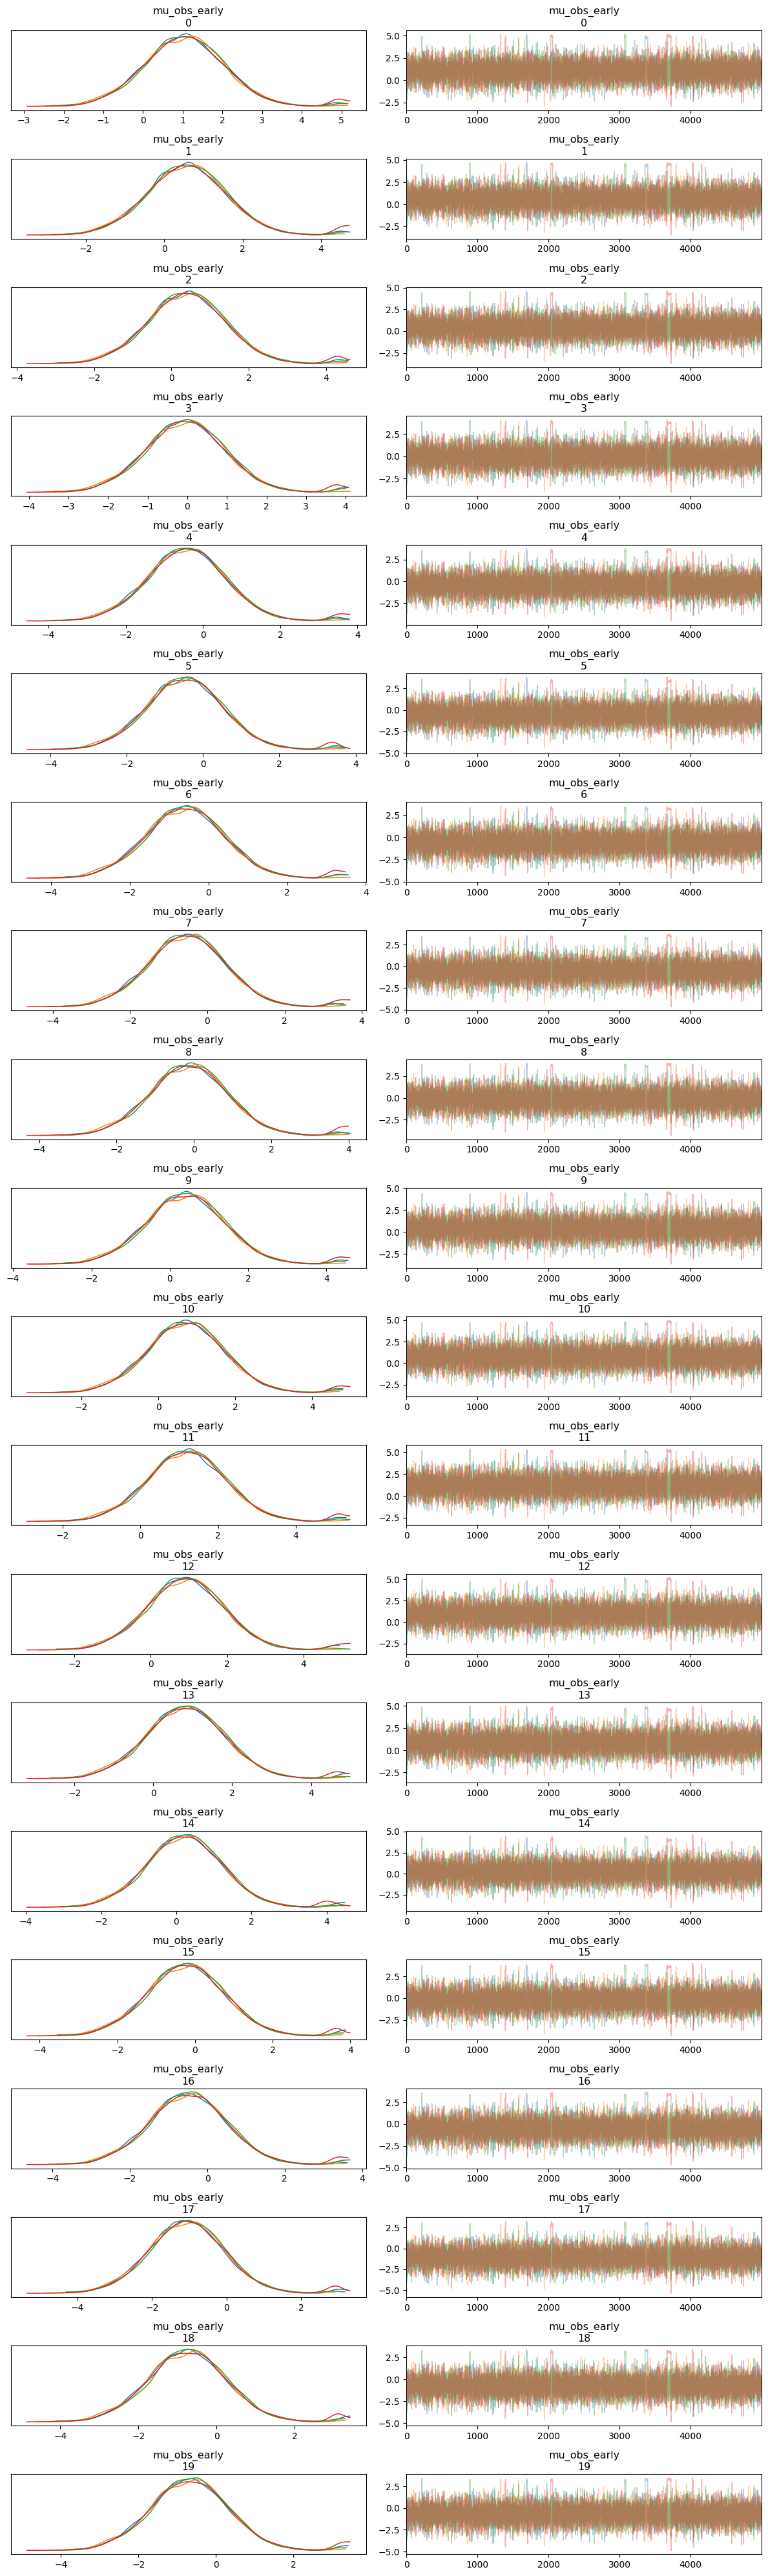

In [ ]:
# Traceplots
az.plot_trace(chains, var_names=["mu_obs_early", "mu_obs_late"], compact=False) #non rural in this case
plt.tight_layout()
plt.show()

In [ ]:
# Posterior distribution of s
# Convert to arviz data type
chains = az.InferenceData(posterior=cpc_fit.draws_xr())
s_chain = np.hstack(chains.posterior.s).astype(int)

# Posterior barplot for s
x, y = np.unique(s_chain, return_counts=True)


In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94])

In [ ]:
y2=y[2:92]
y2

array([  7,   8,   6,   5,   4,   3,   3,   6,   5,   8,   2,   6,   4,
         6,   7,   5,   4,  10,   3,   5,   2,   3,   3,   4,   3,   3,
         6,   2,   1,   3,   3,   3,   6,   2,  12,  24,  30,  40,  32,
        37,  72,  87,  63,  35,  34,  26,  31,  73,  93,  53,  33,  17,
        17,  27,  20,  19,  17,  18,  26,  19,  14,   8,  12,  10,   8,
        13,   7,  11,  12,  16,  13,  16,  20,  18,  19,  25,  27,  68,
        78,  53,  72, 196, 203, 159, 251, 150,  80,  31,  43,  80])

In [ ]:
print("Posterior Mode: {0}".format(data2.Time[x[y == y.max()]].to_numpy().squeeze()))

Posterior Mode: febbraio 16


In [ ]:
# Trova gli indici dei valori ordinati in ordine decrescente
sorted_indices = np.argsort(-y)

# Seleziona il secondo massimo
second_max_index = sorted_indices[1]

# Stampa il secondo massimo
print("Secondo massimo: {0}".format(data2.Time[x[second_max_index]]))


Secondo massimo: aprile 23


# Some stations


In [ ]:
import pandas as pd
import random

# Assuming you have a DataFrame named df with a column named 'Id_sensor'

# Generate a list of 4 random unique Id_sensor values
unique_id_sensors = data['Id_sensor'].unique()
random_id_sensors = random.sample(list(unique_id_sensors), 4)
model2 = CmdStanModel(stan_file=stan_file)

# Iterate over each random Id_sensor value
for id_sensor in random_id_sensors:
    subset_df = data[data['Id_sensor'] == id_sensor]

    cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.area,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

    # Algorithm parameters
    algo_params = {
        "n_chains": 4,
        "n_burnin": 1000,
        "n_iter": 5000
    }

    # Sample
    cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                      iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
    # Convert to arviz data type
    chains = az.InferenceData(posterior=cpc_fit.draws_xr())
    s_chain = np.hstack(chains.posterior.s).astype(int)
    x, y = np.unique(s_chain, return_counts=True)
    print(y)
    print(id_sensor)
    print("Posterior Mode: {0}".format(data2.Time[x[y == y.max()]].to_numpy().squeeze()))
    sorted_indices = np.argsort(-y)
    # Seleziona il secondo massimo
    second_max_index = sorted_indices[1]
    print("Secondo massimo: {0}".format(data2.Time[x[second_max_index]]))



DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/eq41aovm.json
18:25:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49881', 'data', 'file=/tmp/tmpuer4ldls/eq41aovm.json', 'output', 'file=/tmp/tmpuer4ldls/model2ehududc8/model2-20240207182531_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=49881', 'data', 'file=/tmp/tmpuer4ldls/eq41aovm.json', 'output', 'file=/tmp/tmpuer4ldls/model2ehududc8/model2-20240207182531_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=498

18:36:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49881', 'data', 'file=/tmp/tmpuer4ldls/eq41aovm.json', 'output', 'file=/tmp/tmpuer4ldls/model2ehududc8/model2-20240207182531_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model2ehududc8/model2-20240207182531_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model2ehududc8/model2-20240207182531_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/kb800djx.json
18:36:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19349    27    22    13    13     7    16    11    10    13     7     5
    14     6     7     5     6     9     6     8     8    13    10    11
    11     5     2     9     5     8     6    11     6     8     7     7
     6     1     6     4     3     6     6     4     6     3     4     1
     3     6     5     2     2     4     6     4     9     4     6     1
     6     6     6     6     4     2     4     6     5     4     6     8
     7     8     3     7     9    10    15    14     5    12     7     5
     7     7     5     1     6     4     4    11     7]
12016
Posterior Mode: febbraio 16
Secondo massimo: marzo 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98033', 'data', 'file=/tmp/tmpuer4ldls/kb800djx.json', 'output', 'file=/tmp/tmpuer4ldls/model2tbxnwdon/model2-20240207183648_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=98033', 'data', 'file=/tmp/tmpuer4ldls/kb800djx.json', 'output', 'file=/tmp/tmpuer4ldls/model2tbxnwdon/model2-20240207183648_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

18:44:24 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=98033', 'data', 'file=/tmp/tmpuer4ldls/kb800djx.json', 'output', 'file=/tmp/tmpuer4ldls/model2tbxnwdon/model2-20240207183648_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model2tbxnwdon/model2-20240207183648_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model2tbxnwdon/model2-20240207183648_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/afaa7k71.json
18:44:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    7    3    3    3    2    4    6    8   10   15   15
   28   45   59  155  232  214  335 1393 2808 1326  825  430  426 1121
 3867 4668 1334  282  101   53   34   21   16   16   15   12   18   11
    7    6    9    5    8    9    3    1    1    1    2    3    1    5
    2    1    4    6    1    1]
6803
Posterior Mode: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=93843', 'data', 'file=/tmp/tmpuer4ldls/afaa7k71.json', 'output', 'file=/tmp/tmpuer4ldls/model26efbpb60/model2-20240207184427_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=93843', 'data', 'file=/tmp/tmpuer4ldls/afaa7k71.json', 'output', 'file=/tmp/tmpuer4ldls/model26efbpb60/model2-20240207184427_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

19:01:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=93843', 'data', 'file=/tmp/tmpuer4ldls/afaa7k71.json', 'output', 'file=/tmp/tmpuer4ldls/model26efbpb60/model2-20240207184427_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model26efbpb60/model2-20240207184427_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model26efbpb60/model2-20240207184427_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuer4ldls/366_zgvg.json
19:01:50 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[16286     6     5     4     8     4     5     8     4    13     9     8
     8    33    60    75    16     9     7     6     5     3     4     3
     5    10     8     5    15     6     7     8    10    10     7     9
     6    14    22    29    24    20    48    85    92    53    45    84
   107   191   255   125    93    88   127   174   143   169   164    94
    85    99    95    60    53    31    48    35    32    24    15    27
    21    12    14    11     8     9    27    51    77    63    42    32
    15     9     6     2     2     7    14    18    15]
6690
Posterior Mode: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9373', 'data', 'file=/tmp/tmpuer4ldls/366_zgvg.json', 'output', 'file=/tmp/tmpuer4ldls/model2xyk_woce/model2-20240207190150_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=9373', 'data', 'file=/tmp/tmpuer4ldls/366_zgvg.json', 'output', 'file=/tmp/tmpuer4ldls/model2xyk_woce/model2-20240207190150_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=9373', 'data', 'file=/tmp/t

19:11:53 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9373', 'data', 'file=/tmp/tmpuer4ldls/366_zgvg.json', 'output', 'file=/tmp/tmpuer4ldls/model2xyk_woce/model2-20240207190150_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpuer4ldls/model2xyk_woce/model2-20240207190150_1.csv
 console_msgs (if any):
	/tmp/tmpuer4ldls/model2xyk_woce/model2-20240207190150_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 


[ 123    1    1    1    1    1    2    1    2    1    1    4    8    4
    5   11   11    6   22   45   61   51   68   70  143  277  713  590
  615  288  773 1988 2159 1218 1057  949 1050 1915 3789 1370  156   56
   46   96   88   37   25   11   15    5    1    3    2    6    3    7
    5    6    3    2    3    4    6    1    2    1    2    2    4    6
    1]
10037
Posterior Mode: aprile 20
Secondo massimo: ottobre 19


# data division per area

In [ ]:

# Divide the dataframe into two datasets based on the 'area' column
df_area_1 = data[data['area'] == 1]
df_area_0 = data[data['area'] == 0]

df_area_1.shape
df_area_0.shape

(4606, 9)

In [ ]:
470/94

5.0

In [ ]:
df=data

# error detection

In [ ]:
id_sensor=df['Id_sensor'].unique()
subset_df = df[df['Id_sensor'] == id_sensor[1]]

# Perform analysis similar to your cod
cpc_data = {
    "N_obs": subset_df.shape[0],
    "p": 4,
    "Y_obs" : subset_df.NOx,
    "t_obs" : subset_df.t,
    "X" : subset_df.iloc[:, 3:7],
    "r": subset_df.area,
    "omega" : 2*3.14/12,
    "month": subset_df.t
    }

        # Algorithm parameters
algo_params = {
    "n_chains": 4,
    "n_burnin": 1000,
    "n_iter": 5000
    }

 # Sample
cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
chains = az.InferenceData(posterior=cpc_fit.draws_xr())
s_chain = np.hstack(chains.posterior.s).astype(int)
x, y = np.unique(s_chain, return_counts=True)
print(y)
print(id_sensor)
print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
sorted_indices = np.argsort(-y)
# Seleziona il secondo massimo
second_max_index = sorted_indices[1]
print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/m9gwaz0y.json
20:00:23 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=97793', 'data', 'file=/tmp/tmp6elsvq18/m9gwaz0y.json', 'output', 'file=/tmp/tmp6elsvq18/model2u1s7ho1n/model2-20240207200024_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=97793', 'data', 'file=/tmp/tmp6elsvq18/m9gwaz0y.json', 'output', 'file=/tmp/tmp6elsvq18/model2u1s7ho1n/model2-20240207200024_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

20:10:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=97793', 'data', 'file=/tmp/tmp6elsvq18/m9gwaz0y.json', 'output', 'file=/tmp/tmp6elsvq18/model2u1s7ho1n/model2-20240207200024_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2u1s7ho1n/model2-20240207200024_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2u1s7ho1n/model2-20240207200024_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[19220    26    14    20    21    10     6     8     6    47    52    55
    29    28    12    13    16    12    11     3     2     5     9    10
     7     9     2     2     7     7     4     4     2     3     2     4
     6     3     7     5     5     2     2     4     5     6     2     3
     6     5     2     2     2     2     4     2     5     4     1     5
     4     3     3     7     3     3     5     4     5     7     4     8
     8     4     5     7     6     4     8     9     7    12     6     6
     8     5    14     9     9     8    13     9     9]
[ 6204  6208  6212  6218  6220  6230  6232  6234  6248  6252  6264  6274
  6326  6330  6354  6364  6366  6374  6380  6382  6386  6398  6400  6412
  6419  6428  6690  6706  6766  6803  6845  6864  9804  9860  9896  9917
  9918  9968 10017 10037 10078 10095 10165 10278 10285 10329 10333 10431
 10451 10457 10505 12016 20441 30162]


KeyError: "None of [Int64Index([1], dtype='int64')] are in the [index]"

In [ ]:
y == y.max()
x[y == y.max()]

array([1])

In [ ]:
print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))


Primo massimo: febbraio 16


In [ ]:
subset_df['Time'].iloc[x[y == y.max()]]

95    febbraio 16
Name: Time, dtype: object

In [ ]:
maxima_indo=[]
maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

In [ ]:
maxima_info

[(array([ 6204,  6208,  6212,  6218,  6220,  6230,  6232,  6234,  6248,
          6252,  6264,  6274,  6326,  6330,  6354,  6364,  6366,  6374,
          6380,  6382,  6386,  6398,  6400,  6412,  6419,  6428,  6690,
          6706,  6766,  6803,  6845,  6864,  9804,  9860,  9896,  9917,
          9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
         10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]),
  95    febbraio 16
  Name: Time, dtype: object,
  'gennaio 17')]

In [ ]:
sorted_indices = np.argsort(-y)
# Seleziona il secondo massimo
second_max_index = sorted_indices[1]

In [ ]:
subset_df['Time'].iloc[x[second_max_index]]

'gennaio 17'

In [ ]:
subset_df['Time'].iloc[x[y == y.max()]]


95    febbraio 16
Name: Time, dtype: object

# All sensors.

N.b: due to run time limits of colab, we weren't able to apply the model in only one for-loop. that's why the code below is fragmented. the result are collected at the end.

**area=1**

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in df['Id_sensor'].unique():
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
maxima_area_1 = find_maxima(df_area_1)
#maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
#df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
print("Massimi per area=1:")
print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
#print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/t1sn9808.json
20:23:21 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=17661', 'data', 'file=/tmp/tmp6elsvq18/t1sn9808.json', 'output', 'file=/tmp/tmp6elsvq18/model2_id4jou5/model2-20240207202321_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=17661', 'data', 'file=/tmp/tmp6elsvq18/t1sn9808.json', 'output', 'file=/tmp/tmp6elsvq18/model2_id4jou5/model2-20240207202321_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=176

20:33:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=17661', 'data', 'file=/tmp/tmp6elsvq18/t1sn9808.json', 'output', 'file=/tmp/tmp6elsvq18/model2_id4jou5/model2-20240207202321_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2_id4jou5/model2-20240207202321_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2_id4jou5/model2-20240207202321_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/qb3vnx9e.json
20:33:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    6  209 1201  652  400  436  390  367 1475 1686 3772 5955 1630
  271  231   67   18   23   51  251  772  126    6    3    1]
9896
Primo massimo: luglio 19
Secondo massimo: giugno 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9097', 'data', 'file=/tmp/tmp6elsvq18/qb3vnx9e.json', 'output', 'file=/tmp/tmp6elsvq18/model2ywcg7hy0/model2-20240207203335_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=9097', 'data', 'file=/tmp/tmp6elsvq18/qb3vnx9e.json', 'output', 'file=/tmp/tmp6elsvq18/model2ywcg7hy0/model2-20240207203335_4.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Baye

20:48:00 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=9097', 'data', 'file=/tmp/tmp6elsvq18/qb3vnx9e.json', 'output', 'file=/tmp/tmp6elsvq18/model2ywcg7hy0/model2-20240207203335_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2ywcg7hy0/model2-20240207203335_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2ywcg7hy0/model2-20240207203335_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/lofuducf.json
20:48:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 296    1    3    2    1    1    1    1    1    1    1    1    2    1
    1    1    2    3    3    5    2    1    1    2    1    3    5    7
    2    2    5    6    2    7   12   35   45   26   26   53  103  278
  446  475  524  239  559  760  508  303  226  222  911 2146 2637 2414
  972 1109 1922 1234  586  150   76   36   57  209  128   55   29   31
   27   15   10   10    7    4    2    2    4    3]
10165
Primo massimo: ottobre 21
Secondo massimo: novembre 21


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=68347', 'data', 'file=/tmp/tmp6elsvq18/lofuducf.json', 'output', 'file=/tmp/tmp6elsvq18/model2dq7oq930/model2-20240207204806_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=68347', 'data', 'file=/tmp/tmp6elsvq18/lofuducf.json', 'output', 'file=/tmp/tmp6elsvq18/model2dq7oq930/model2-20240207204806_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

20:59:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=68347', 'data', 'file=/tmp/tmp6elsvq18/lofuducf.json', 'output', 'file=/tmp/tmp6elsvq18/model2dq7oq930/model2-20240207204806_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2dq7oq930/model2-20240207204806_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2dq7oq930/model2-20240207204806_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/7j_dsjr7.json
20:59:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   4    2    3    1    1    1    2    4    4    2    1    1    1    1
    1    1    2    1    1    1    1    1    1    2    3    2    3    5
    1    5    5    4    4    2   14    5    2    7    4    6   16   14
   11    7    8   20   13    9    4    7    8    9   23   24   13   19
   15   46  111  188  179  248  473 1142 1104 1423 3056  657  432 1457
 1413 5185  892  561  556  186  135   46   16   17   11   20   57   36
   21]
10457
Primo massimo: ottobre 22
Secondo massimo: maggio 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=22222', 'data', 'file=/tmp/tmp6elsvq18/7j_dsjr7.json', 'output', 'file=/tmp/tmp6elsvq18/model2gxwqw5ko/model2-20240207205929_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=22222', 'data', 'file=/tmp/tmp6elsvq18/7j_dsjr7.json', 'output', 'file=/tmp/tmp6elsvq18/model2gxwqw5ko/model2-20240207205929_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=22222', 'data', 'file=/tm

21:08:43 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=22222', 'data', 'file=/tmp/tmp6elsvq18/7j_dsjr7.json', 'output', 'file=/tmp/tmp6elsvq18/model2gxwqw5ko/model2-20240207205929_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2gxwqw5ko/model2-20240207205929_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2gxwqw5ko/model2-20240207205929_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/ch1pwm8z.json
21:08:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19271    27    29    19    13    13    10     5    12    11     8     8
    10     4    13     8     5    10    10     6     9    11    14     8
    10     4     8     7     9     9     8    12     4    12    12     4
     8     8     8     5     3     6     3     2     2     6     7     4
     5     9     5     5     3     3     8     9     6     1     5     4
     8     3     8     5     4     8     2     5     7     7     6     5
    12     8     9     6     9     6     3    15     7     6     7    10
     9     8     8     8     8     9     7     6     5     8]
12016
Primo massimo: febbraio 16
Secondo massimo: aprile 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49926', 'data', 'file=/tmp/tmp6elsvq18/ch1pwm8z.json', 'output', 'file=/tmp/tmp6elsvq18/model28ypyyouy/model2-20240207210847_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=49926', 'data', 'file=/tmp/tmp6elsvq18/ch1pwm8z.json', 'output', 'file=/tmp/tmp6elsvq18/model28ypyyouy/model2-20240207210847_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=49926', 'data', 'file=/tm

21:24:53 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=49926', 'data', 'file=/tmp/tmp6elsvq18/ch1pwm8z.json', 'output', 'file=/tmp/tmp6elsvq18/model28ypyyouy/model2-20240207210847_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model28ypyyouy/model2-20240207210847_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model28ypyyouy/model2-20240207210847_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[ 687  101   63   64   58   60   54   45   48   49   52   44   40   29
   34   22   24   20   17   37   18   24   24   18   25   39   15   36
   27   30   14   28   28   29   24   18   29   26   24   23   19   18
   34   26   31   35   39   50   44   40   42   37   40   21   38   35
   28   25   36   38   35   22   29   36   29   22   37   44   60   70
   58   76   73   72  114  275  523  727 1516 2238 2852 2890 3272 1286
  238  104   84   97   52   50   49   60   72  115]
20441
Primo massimo: dicembre 22
Secondo massimo: novembre 22
Massimi per area=1:
   Id_sensor                                  Primo_massimo Secondo_massimo
0       9896    3238    luglio 19
Name: Time, dtype: object       giugno 19
1      10165   4017    ottobre 21
Name: Time, dtype: object     novembre 21
2      10457   4687    ottobre 22
Name: Time, dtype: object       maggio 22
3      12016  4795    febbraio 16
Name: Time, dtype: object       aprile 16
4      20441  4971    dicembre 22
Name: Time, dtype: object

In [ ]:
df_maxima_1

,Id_sensor,Primo_massimo,Secondo_massimo
0,9896,"3238 luglio 19 Name: Time, dtype: object",giugno 19
1,10165,"4017 ottobre 21 Name: Time, dtype: object",novembre 21
2,10457,"4687 ottobre 22 Name: Time, dtype: object",maggio 22
3,12016,"4795 febbraio 16 Name: Time, dtype: object",aprile 16
4,20441,"4971 dicembre 22 Name: Time, dtype: object",novembre 22


**area = 0**

In [ ]:
df_area_0.shape[0]/94

49.0

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in df['Id_sensor'].unique():
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/g_111q5e.json
21:41:42 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=81914', 'data', 'file=/tmp/tmp6elsvq18/g_111q5e.json', 'output', 'file=/tmp/tmp6elsvq18/model2_6a47boo/model2-20240207214142_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=81914', 'data', 'file=/tmp/tmp6elsvq18/g_111q5e.json', 'output', 'file=/tmp/tmp6elsvq18/model2_6a47boo/model2-20240207214142_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=81914', 'data', 'file=/tm

21:50:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=81914', 'data', 'file=/tmp/tmp6elsvq18/g_111q5e.json', 'output', 'file=/tmp/tmp6elsvq18/model2_6a47boo/model2-20240207214142_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2_6a47boo/model2-20240207214142_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2_6a47boo/model2-20240207214142_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/5fbhj9p6.json
21:50:32 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19686     3     3     5     3     1     2     1     1     1     1     2
     2     1     1     1     1     2     3     2     1     1     1     1
     1     1     2     1     4     2     7     3     1    11     5     8
    10    10    14     9     3    10     6     9    14    18    10     5
     4     3     5     8     3     3     2     3     3     6     1     1
     1     1     1     2     3     3     5     1     1     1     1     3
     2     6     4     1     1     2     3     4     3     4     3     1
     3     2     2     2     2]
6204
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=13496', 'data', 'file=/tmp/tmp6elsvq18/5fbhj9p6.json', 'output', 'file=/tmp/tmp6elsvq18/model2q06w_pod/model2-20240207215032_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=13496', 'data', 'file=/tmp/tmp6elsvq18/5fbhj9p6.json', 'output', 'file=/tmp/tmp6elsvq18/model2q06w_pod/model2-20240207215032_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=13496', 'data', 'file=/tm

21:59:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=13496', 'data', 'file=/tmp/tmp6elsvq18/5fbhj9p6.json', 'output', 'file=/tmp/tmp6elsvq18/model2q06w_pod/model2-20240207215032_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2q06w_pod/model2-20240207215032_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2q06w_pod/model2-20240207215032_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/56yyh_y6.json
21:59:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19258    20    14    18    10     8     9     7     6    25    31    52
    23    28    22    12    16     6     9     3     4     5     7     5
     3     2     7     5     4     3     5     8     4     2     5     5
     3     8     8     3     3     1     2     2     2     2     2     3
     2     2     3     4     2     6     3     5     6     2     6     1
     7     1    10     2     5     4     6     2     4     8     3     3
     5     6     4     6     8    10    18     5    13    12    11    15
     9    12    17    11    11    15    16     9]
6208
Primo massimo: febbraio 16
Secondo massimo: gennaio 17


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=8785', 'data', 'file=/tmp/tmp6elsvq18/56yyh_y6.json', 'output', 'file=/tmp/tmp6elsvq18/model2prllecfa/model2-20240207215937_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=8785', 'data', 'file=/tmp/tmp6elsvq18/56yyh_y6.json', 'output', 'file=/tmp/tmp6elsvq18/model2prllecfa/model2-20240207215937_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=8785'

22:08:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=8785', 'data', 'file=/tmp/tmp6elsvq18/56yyh_y6.json', 'output', 'file=/tmp/tmp6elsvq18/model2prllecfa/model2-20240207215937_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2prllecfa/model2-20240207215937_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2prllecfa/model2-20240207215937_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/qtn41vm8.json
22:08:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    5   17   31   15    9    9   16   91  110  109  197  246  406
  593  751  265   55   60   54  129  164  536  501  406  282  677 2569
 1637  556  223  398  783 2483 4196 1070  107   86   49   26   31   11
    7    7    5    2    1    2    1    1    1    1    1    1    2    1
    3    3    1]
6212
Primo massimo: aprile 20
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=63302', 'data', 'file=/tmp/tmp6elsvq18/qtn41vm8.json', 'output', 'file=/tmp/tmp6elsvq18/model2w2sxco51/model2-20240207220825_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=63302', 'data', 'file=/tmp/tmp6elsvq18/qtn41vm8.json', 'output', 'file=/tmp/tmp6elsvq18/model2w2sxco51/model2-20240207220825_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

22:17:00 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=63302', 'data', 'file=/tmp/tmp6elsvq18/qtn41vm8.json', 'output', 'file=/tmp/tmp6elsvq18/model2w2sxco51/model2-20240207220825_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2w2sxco51/model2-20240207220825_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2w2sxco51/model2-20240207220825_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/tb7vqxrc.json
22:17:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19549    14     6     6     6     2     4     3     3     4     1     5
     1     1     1     2     7     5     3     3     3     2     6     6
     5     5     8    12    12    12     9     3     4     3     6    14
    15    15    14    10    13    19    29    11     7     7     8     5
     3     6     5     2     2     1     2     2     2     4     3     4
     3     5     2     6     1     1     5     1     3     2     3     3
     3     2     3     2     2     1     2     4     5     2     1     3
     1     4     4     1]
6218
Primo massimo: febbraio 16
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=54278', 'data', 'file=/tmp/tmp6elsvq18/tb7vqxrc.json', 'output', 'file=/tmp/tmp6elsvq18/model2xfg5js2u/model2-20240207221706_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=54278', 'data', 'file=/tmp/tmp6elsvq18/tb7vqxrc.json', 'output', 'file=/tmp/tmp6elsvq18/model2xfg5js2u/model2-20240207221706_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=542

22:31:32 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=54278', 'data', 'file=/tmp/tmp6elsvq18/tb7vqxrc.json', 'output', 'file=/tmp/tmp6elsvq18/model2xfg5js2u/model2-20240207221706_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2xfg5js2u/model2-20240207221706_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2xfg5js2u/model2-20240207221706_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/f7_rr2o1.json
22:31:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3275    1    1    1    6   22   80   38   67  161  559  739  304  293
  275  364 2128 3128  870  410  544  267  345  230  292  280  224  225
  502  842  463  345  336  537  537  630  609   51    7    4    1    2
    1    1    1    1    1]
6220
Primo massimo: febbraio 16
Secondo massimo: settembre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=91517', 'data', 'file=/tmp/tmp6elsvq18/f7_rr2o1.json', 'output', 'file=/tmp/tmp6elsvq18/model27alr1blb/model2-20240207223138_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=91517', 'data', 'file=/tmp/tmp6elsvq18/f7_rr2o1.json', 'output', 'file=/tmp/tmp6elsvq18/model27alr1blb/model2-20240207223138_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=91517', 'data', 'file=/tm

22:49:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=91517', 'data', 'file=/tmp/tmp6elsvq18/f7_rr2o1.json', 'output', 'file=/tmp/tmp6elsvq18/model27alr1blb/model2-20240207223138_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model27alr1blb/model2-20240207223138_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model27alr1blb/model2-20240207223138_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/g98rrs2b.json
22:49:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3265    3    4    3    4    3    1    1    1    1    1    3    3    3
    2    1    3    3    2    6    8    5    6    6    8    5    7   11
    5    3   12   12    8   11   12    9   13   37   47   58   56  111
  230  158  107  108  134  147  367  476  137   34   30   29   36   35
   20   19   30   44   28   25   28   25   32   76  306  168  246  217
  191  403  440  394  193  164  258  646 2809 3122 1770  894  819  332
  114  108   40   14    9   46  101   41   37]
6230
Primo massimo: febbraio 16
Secondo massimo: ottobre 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=16140', 'data', 'file=/tmp/tmp6elsvq18/g98rrs2b.json', 'output', 'file=/tmp/tmp6elsvq18/model2bfpgz1cn/model2-20240207224938_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=16140', 'data', 'file=/tmp/tmp6elsvq18/g98rrs2b.json', 'output', 'file=/tmp/tmp6elsvq18/model2bfpgz1cn/model2-20240207224938_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=4', 'random', 'seed=16140', 'data', 'file=/tm

22:58:31 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=16140', 'data', 'file=/tmp/tmp6elsvq18/g98rrs2b.json', 'output', 'file=/tmp/tmp6elsvq18/model2bfpgz1cn/model2-20240207224938_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2bfpgz1cn/model2-20240207224938_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2bfpgz1cn/model2-20240207224938_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/zhktwu1m.json
22:58:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3826    1    1    1    1    3    3    2    2    2    2    8    6   30
   47   77  177  545  954 1280  939  495  509  645 4904 5377  149    7
    1    1    2    2    1]
6232
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=99125', 'data', 'file=/tmp/tmp6elsvq18/zhktwu1m.json', 'output', 'file=/tmp/tmp6elsvq18/model2fdjc5sei/model2-20240207225836_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=99125', 'data', 'file=/tmp/tmp6elsvq18/zhktwu1m.json', 'output', 'file=/tmp/tmp6elsvq18/model2fdjc5sei/model2-20240207225836_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

23:13:35 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=99125', 'data', 'file=/tmp/tmp6elsvq18/zhktwu1m.json', 'output', 'file=/tmp/tmp6elsvq18/model2fdjc5sei/model2-20240207225836_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2fdjc5sei/model2-20240207225836_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2fdjc5sei/model2-20240207225836_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/sme7w8_0.json
23:13:40 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 338    1    1    1    3    1    1    1    1    2    2    5    5   10
   13   27   32   21   26   59  140  163  102   72   98   96  112  157
   98   75   72   91  198  198  383  334  468  611 1641 3436 2208 1079
  749  617 1015 1652 1732  397   90   37   30   54   61   32   36   22
   50   22   15   14    7    2   10   21   14   18    7    8   22   28
   20   16    8    6   16   64  126   52   50   22   61   33   15   18
   18   21   51   70  142   47]
6234
Primo massimo: settembre 19
Secondo massimo: ottobre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5847', 'data', 'file=/tmp/tmp6elsvq18/sme7w8_0.json', 'output', 'file=/tmp/tmp6elsvq18/model2el2mhhyp/model2-20240207231340_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=5847', 'data', 'file=/tmp/tmp6elsvq18/sme7w8_0.json', 'output', 'file=/tmp/tmp6elsvq18/model2el2mhhyp/model2-20240207231340_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=5847', 'data', 'file=/tmp/t

23:23:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5847', 'data', 'file=/tmp/tmp6elsvq18/sme7w8_0.json', 'output', 'file=/tmp/tmp6elsvq18/model2el2mhhyp/model2-20240207231340_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2el2mhhyp/model2-20240207231340_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2el2mhhyp/model2-20240207231340_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/e0frhoe3.json
23:23:53 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[5100    5    4    1    4    1    1    2    1    1    2    2    1    1
    7   11   19   28   19   48   97  199  142   68   77   90   94  164
  402  102  135  173  157  189  178  292  260  184  178  465 1092  403
  500  691  886 1062 2596 2777  370   53   26   30   19   19   14   17
   17    9    5    4    7    2   10    5   18   12    7    6    7   12
   19   15   13   11   16   16   36   38   19   28   32   18   15   27
   20   16   17    7    6   13   38]
6248
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=61764', 'data', 'file=/tmp/tmp6elsvq18/e0frhoe3.json', 'output', 'file=/tmp/tmp6elsvq18/model21wlt59cp/model2-20240207232353_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=61764', 'data', 'file=/tmp/tmp6elsvq18/e0frhoe3.json', 'output', 'file=/tmp/tmp6elsvq18/model21wlt59cp/model2-20240207232353_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=617

23:32:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=61764', 'data', 'file=/tmp/tmp6elsvq18/e0frhoe3.json', 'output', 'file=/tmp/tmp6elsvq18/model21wlt59cp/model2-20240207232353_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model21wlt59cp/model2-20240207232353_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model21wlt59cp/model2-20240207232353_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


23:32:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 3 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/rqif9hlu.json
23:32:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[7706    2    1    2    9    9   43  157  276  265  282  412  922 1202
 1640  383  239  216  164  105   42   36   63   81  149  276  697  308
  175  161  298  345  952 2108  249    5    4    7    3    2    3    1]
6252
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=89530', 'data', 'file=/tmp/tmp6elsvq18/rqif9hlu.json', 'output', 'file=/tmp/tmp6elsvq18/model2_9c_8q0j/model2-20240207233229_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=89530', 'data', 'file=/tmp/tmp6elsvq18/rqif9hlu.json', 'output', 'file=/tmp/tmp6elsvq18/model2_9c_8q0j/model2-20240207233229_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=89530', 'data', 'file=/tm

23:42:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=89530', 'data', 'file=/tmp/tmp6elsvq18/rqif9hlu.json', 'output', 'file=/tmp/tmp6elsvq18/model2_9c_8q0j/model2-20240207233229_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2_9c_8q0j/model2-20240207233229_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2_9c_8q0j/model2-20240207233229_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/b2grhjs8.json
23:42:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[5990    8    3    4    6    3    1    2    1    3    2    1    4    3
    8    7    9   10   18   30   46   73  113  104   88   79   47   63
   64   82   61  135  302  415  429  306  395  869  685  686  687  876
 1347 2116 2023  402   85   47   63   72   37   51   61   41   48   40
   38   43   22   24   38   33   37   24   35   33   31   25   22   31
   24   27   59   74   47   13   20   25   15   10   13   11    6    8
    7   25    9   20]
6264
Primo massimo: febbraio 16
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=56909', 'data', 'file=/tmp/tmp6elsvq18/b2grhjs8.json', 'output', 'file=/tmp/tmp6elsvq18/model29ev_7s47/model2-20240207234209_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=56909', 'data', 'file=/tmp/tmp6elsvq18/b2grhjs8.json', 'output', 'file=/tmp/tmp6elsvq18/model29ev_7s47/model2-20240207234209_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=569

23:51:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=56909', 'data', 'file=/tmp/tmp6elsvq18/b2grhjs8.json', 'output', 'file=/tmp/tmp6elsvq18/model29ev_7s47/model2-20240207234209_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model29ev_7s47/model2-20240207234209_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model29ev_7s47/model2-20240207234209_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/5a5w8tg1.json
23:51:34 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[18238    11     6    13     5     4     9     9    10    14     9     7
     3     5    17    15    10     9    13    25    22    16    12    29
    58    68    47    60    46    36    36    46    49    36    33    22
    26    39    54    52    56    38    40    55    41    20    15    13
    18    22    20    19     6     6     8    12    15     4     9     6
    15    11    17     5     8     8     7     5    11     8     3     6
    19    23    23     7    16     4     6    20    24    13    12    13
    11    12    10     6     5     8     8     5     7     2]
6274
Primo massimo: febbraio 16
Secondo massimo: marzo 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=65744', 'data', 'file=/tmp/tmp6elsvq18/5a5w8tg1.json', 'output', 'file=/tmp/tmp6elsvq18/model28hhq29fd/model2-20240207235135_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=65744', 'data', 'file=/tmp/tmp6elsvq18/5a5w8tg1.json', 'output', 'file=/tmp/tmp6elsvq18/model28hhq29fd/model2-20240207235135_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

00:18:04 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=65744', 'data', 'file=/tmp/tmp6elsvq18/5a5w8tg1.json', 'output', 'file=/tmp/tmp6elsvq18/model28hhq29fd/model2-20240207235135_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model28hhq29fd/model2-20240207235135_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model28hhq29fd/model2-20240207235135_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/8n6npxdh.json
00:18:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    2    5    8   12   17   25   37   38   39   54  379  644  982
  790 6019 7550 1106  256  201  214  182  418  611  199   41   16   26
   28   35   12   10    8    3    2    3    4    2    3    3    3    1
    1    1    2    2    2    1    1    1]
6326
Primo massimo: settembre 19
Secondo massimo: agosto 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27610', 'data', 'file=/tmp/tmp6elsvq18/8n6npxdh.json', 'output', 'file=/tmp/tmp6elsvq18/model2y55fjfw7/model2-20240208001808_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=27610', 'data', 'file=/tmp/tmp6elsvq18/8n6npxdh.json', 'output', 'file=/tmp/tmp6elsvq18/model2y55fjfw7/model2-20240208001808_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

00:26:17 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=27610', 'data', 'file=/tmp/tmp6elsvq18/8n6npxdh.json', 'output', 'file=/tmp/tmp6elsvq18/model2y55fjfw7/model2-20240208001808_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2y55fjfw7/model2-20240208001808_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2y55fjfw7/model2-20240208001808_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/5nfnzeac.json
00:26:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[1828    1    1    1    1    1    2    2    2    5    6    8   10   14
   43  176  239  458  590 1052 1255 3802 6506  868  210  135  150  169
  154  123  123  111   67   56   70   46   12   24   45   48   16   19
   20   23   62   73   56   37   13   13   46  659  473   52    9   11
    2    2]
6330
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5212', 'data', 'file=/tmp/tmp6elsvq18/5nfnzeac.json', 'output', 'file=/tmp/tmp6elsvq18/model21fqr49um/model2-20240208002622_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=5212', 'data', 'file=/tmp/tmp6elsvq18/5nfnzeac.json', 'output', 'file=/tmp/tmp6elsvq18/model21fqr49um/model2-20240208002622_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=5212', 'data', 'file=/tmp/t

00:40:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=5212', 'data', 'file=/tmp/tmp6elsvq18/5nfnzeac.json', 'output', 'file=/tmp/tmp6elsvq18/model21fqr49um/model2-20240208002622_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model21fqr49um/model2-20240208002622_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model21fqr49um/model2-20240208002622_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/yhxv5q73.json
00:40:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[6074    3    1    3    4    6   25   81   88   47   53   74  169  109
  190  172  165  153   94   52   50  148  138  191  171  322  507  232
  290  333  611  808 1890 3753  572   86   53   65  126  189  222  244
  134   84   62   65   44   21   32   46  120    9   14   15   32   19
   18   33   41   29   50   92  267  110   39   16   27    2    2    5
    3    2    1    1    1]
6354
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=26399', 'data', 'file=/tmp/tmp6elsvq18/yhxv5q73.json', 'output', 'file=/tmp/tmp6elsvq18/model2l4eawc2x/model2-20240208004015_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=26399', 'data', 'file=/tmp/tmp6elsvq18/yhxv5q73.json', 'output', 'file=/tmp/tmp6elsvq18/model2l4eawc2x/model2-20240208004015_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=26399', 'data', 'file=/tm

00:49:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=26399', 'data', 'file=/tmp/tmp6elsvq18/yhxv5q73.json', 'output', 'file=/tmp/tmp6elsvq18/model2l4eawc2x/model2-20240208004015_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2l4eawc2x/model2-20240208004015_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2l4eawc2x/model2-20240208004015_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/qckdx0p7.json
00:50:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    4    2    1    2    1    1    1    1    1    1    1    1    1
    2    3    1    2    3    4    7   15   19   16   21   33  107  181
  173  123  289  754  860  786  700  949 1036 1620 1433  525  159  106
  189  315  472  317  289  301  352  311  226  185   76   39   57  100
   59   45   43   19   62   81   92   79   67   92  267  818 1641 1552
  806  583  248   78   47   15   13    8   12   17   25   56]
6364
Primo massimo: ottobre 22
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=48023', 'data', 'file=/tmp/tmp6elsvq18/qckdx0p7.json', 'output', 'file=/tmp/tmp6elsvq18/model2bctj28b7/model2-20240208005003_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=48023', 'data', 'file=/tmp/tmp6elsvq18/qckdx0p7.json', 'output', 'file=/tmp/tmp6elsvq18/model2bctj28b7/model2-20240208005003_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=480

00:58:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=48023', 'data', 'file=/tmp/tmp6elsvq18/qckdx0p7.json', 'output', 'file=/tmp/tmp6elsvq18/model2bctj28b7/model2-20240208005003_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2bctj28b7/model2-20240208005003_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2bctj28b7/model2-20240208005003_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


00:58:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 8 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 2 had 8 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/dd19ynpy.json
00:58:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[5056    4    2    1    1    4    4    1   10   13    4   17   13   10
   15   12    6   11   25   62   90  116  314  648  336  544  626 1236
  553 1676 4977 2052  357  183  148  128   55   57  105   58   89  100
   75   51   17    8   10    8    2    3    1    3    4    2    7   29
   21   13    7    7    4    2    1    3    1    1    1]
6366
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=14586', 'data', 'file=/tmp/tmp6elsvq18/dd19ynpy.json', 'output', 'file=/tmp/tmp6elsvq18/model2k2gunbb6/model2-20240208005825_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=14586', 'data', 'file=/tmp/tmp6elsvq18/dd19ynpy.json', 'output', 'file=/tmp/tmp6elsvq18/model2k2gunbb6/model2-20240208005825_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=14586', 'data', 'file=/tm

01:15:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=14586', 'data', 'file=/tmp/tmp6elsvq18/dd19ynpy.json', 'output', 'file=/tmp/tmp6elsvq18/model2k2gunbb6/model2-20240208005825_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2k2gunbb6/model2-20240208005825_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2k2gunbb6/model2-20240208005825_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


01:15:23 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 17 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 4 had 17 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/cgomarjc.json
01:15:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[14723    66    73    52    52    38    23    36    38    31    26    27
    23    23    39    38    23    25    20    26    40    36    34    18
    25    31    45    37    37    34    34    41    58    41    35    23
    28    22    17    19    18    25    26    34    21    30    24    30
    29    27    29    22    20    11    11    16    16    17    11    17
    29    27    37    33    35    30    43    80   138    95    62    68
    73    60    40    55    57    63    61   104   105    58    62    46
   127   233   205   221   145   134   183   304   332   164]
6374
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74316', 'data', 'file=/tmp/tmp6elsvq18/cgomarjc.json', 'output', 'file=/tmp/tmp6elsvq18/model2l2y9p3jr/model2-20240208011526_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=74316', 'data', 'file=/tmp/tmp6elsvq18/cgomarjc.json', 'output', 'file=/tmp/tmp6elsvq18/model2l2y9p3jr/model2-20240208011526_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=74316', 'data', 'file=/tm

01:31:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=74316', 'data', 'file=/tmp/tmp6elsvq18/cgomarjc.json', 'output', 'file=/tmp/tmp6elsvq18/model2l2y9p3jr/model2-20240208011526_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2l2y9p3jr/model2-20240208011526_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2l2y9p3jr/model2-20240208011526_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


01:31:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 4 had 1 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/k8kpv7jn.json
01:31:44 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[17597    33    20    16    27    18    23    23    15    16    20    20
    98   144   328   128    71    63    57    62    43    30    18    18
    34    34    22    26    13    21    20    25     9     9    15     7
     6    15    11     4     9     9    14     8    17    11    14     9
     9    10    11     7     9     7     8     9    14     9     4     6
     4    12     7     8     6     4    10     9    10     5     6     9
     6    15     9    12    19    13    23    18    17    12    16    17
    21    39    48    32    10    18    31    61    64    56]
6380
Primo massimo: febbraio 16
Secondo massimo: aprile 17


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=13619', 'data', 'file=/tmp/tmp6elsvq18/k8kpv7jn.json', 'output', 'file=/tmp/tmp6elsvq18/model25vp131wf/model2-20240208013144_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=13619', 'data', 'file=/tmp/tmp6elsvq18/k8kpv7jn.json', 'output', 'file=/tmp/tmp6elsvq18/model25vp131wf/model2-20240208013144_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Ba

01:46:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=13619', 'data', 'file=/tmp/tmp6elsvq18/k8kpv7jn.json', 'output', 'file=/tmp/tmp6elsvq18/model25vp131wf/model2-20240208013144_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model25vp131wf/model2-20240208013144_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model25vp131wf/model2-20240208013144_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/hqq_1wpn.json
01:46:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19393    15    13    15    16    18    33    41    15    10    11    12
    12     8     5     5     6    11     9     4     7     7     6    11
     7    12     9     4     7     2     1     5     6     5     4     6
     4     7     2     1     5     6     2     5     5     2     3     5
     4     6     6     1     2     5     5     3     1     1     2     5
     2     3     3     5     2     3     4     3     4     3     9     5
     3     5     3     5     2     5     8     4     8     7     3     7
     2    10     6     8     4     4     8     7     6]
6382
Primo massimo: febbraio 16
Secondo massimo: settembre 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=37088', 'data', 'file=/tmp/tmp6elsvq18/hqq_1wpn.json', 'output', 'file=/tmp/tmp6elsvq18/model2vngmpb1e/model2-20240208014610_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=37088', 'data', 'file=/tmp/tmp6elsvq18/hqq_1wpn.json', 'output', 'file=/tmp/tmp6elsvq18/model2vngmpb1e/model2-20240208014610_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=370

02:04:49 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=37088', 'data', 'file=/tmp/tmp6elsvq18/hqq_1wpn.json', 'output', 'file=/tmp/tmp6elsvq18/model2vngmpb1e/model2-20240208014610_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp6elsvq18/model2vngmpb1e/model2-20240208014610_1.csv
 console_msgs (if any):
	/tmp/tmp6elsvq18/model2vngmpb1e/model2-20240208014610_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/Bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6elsvq18/1moh2_f_.json
02:04:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[5008    1    2    1    2    3    2    1    1    3    4    1    1    4
    1    2    2    2    1    3    1    3    5   20   30   31   52  231
  394  374  517  807 1382  523  677  614  665  668 2254 3358  573  169
   93   82  103  134   88   56   90  100   51   55   33   20   20   30
   43   36   51   55   25   41   44   41   25    8    6   11   34   43
   34   39   44   12    3   11    6    9    5    6    6   12    2]
6386
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=2', 'random', 'seed=88870', 'data', 'file=/tmp/tmp6elsvq18/1moh2_f_.json', 'output', 'file=/tmp/tmp6elsvq18/model2mbif2n7h/model2-20240208020455_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=3', 'random', 'seed=88870', 'data', 'file=/tmp/tmp6elsvq18/1moh2_f_.json', 'output', 'file=/tmp/tmp6elsvq18/model2mbif2n7h/model2-20240208020455_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/Bayesian/stan/model2', 'id=1', 'random', 'seed=888

Unfortunately, the run time was disconnected during the process and data are not saved. However, we don't want to loose the 4 hours of work, thus we manually save the data

In [ ]:
#6386
df['Id_sensor'].unique()
SENSORS_tofinish=[6386,  6398,  6400,  6412,  6419,  6428,  6690,
        6706,  6766,  6803,  6845,  6864,  9804,  9860,  9896,  9917,
        9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in SENSORS_tofinish:
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/_jb4_ok7.json
07:58:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=52153', 'data', 'file=/tmp/tmpmp0w2iex/_jb4_ok7.json', 'output', 'file=/tmp/tmpmp0w2iex/model2u0n3kjxd/model2-20240208075847_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=52153', 'data', 'file=/tmp/tmpmp0w2iex/_jb4_ok7.json', 'output', 'file=/tmp/tmpmp0w2iex/model2u0n3kjxd/model2-20240208075847_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/ba

08:05:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=52153', 'data', 'file=/tmp/tmpmp0w2iex/_jb4_ok7.json', 'output', 'file=/tmp/tmpmp0w2iex/model2u0n3kjxd/model2-20240208075847_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2u0n3kjxd/model2-20240208075847_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2u0n3kjxd/model2-20240208075847_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/y_igcf4s.json
08:05:24 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[  10    1    3    2    2    1    1    1    2    1    1    2    1    2
    7    4    2    3    3    1    2    2    2    1    2    2    5    3
   11   17   18   43   70  268  428  510  640 1027 1791  663  868  834
  870  925 3159 4597  813  207  134   97  136  147  130   77  115  127
   59   68   42   36   35   48   81   63   69   70   34   48   69   66
   43    9    6    9   34   55   46   35   51   28    4   10    6    7
    7    4   10   29   28]
6386
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=38131', 'data', 'file=/tmp/tmpmp0w2iex/y_igcf4s.json', 'output', 'file=/tmp/tmpmp0w2iex/model2s78alzsy/model2-20240208080524_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=38131', 'data', 'file=/tmp/tmpmp0w2iex/y_igcf4s.json', 'output', 'file=/tmp/tmpmp0w2iex/model2s78alzsy/model2-20240208080524_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=38131', 'data', 'file=/tm

08:11:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=38131', 'data', 'file=/tmp/tmpmp0w2iex/y_igcf4s.json', 'output', 'file=/tmp/tmpmp0w2iex/model2s78alzsy/model2-20240208080524_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2s78alzsy/model2-20240208080524_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2s78alzsy/model2-20240208080524_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/59k7z5r8.json
08:12:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 215    4    1    2    1    7    6   11    8   19   24   86  250  130
  109  139  187  545  884 3857 4031 2478 2004 1558 1206  370  192  130
  167  151  360  643  171   22    9    9    4    2    2    1    1    1
    2    1]
6398
Primo massimo: maggio 19
Secondo massimo: aprile 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=12907', 'data', 'file=/tmp/tmpmp0w2iex/59k7z5r8.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xyb56v_m/model2-20240208081204_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=12907', 'data', 'file=/tmp/tmpmp0w2iex/59k7z5r8.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xyb56v_m/model2-20240208081204_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=4', 'random', 'seed=129

08:18:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=12907', 'data', 'file=/tmp/tmpmp0w2iex/59k7z5r8.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xyb56v_m/model2-20240208081204_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2xyb56v_m/model2-20240208081204_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2xyb56v_m/model2-20240208081204_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/z6iugd97.json
08:19:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[2752    1    1    4    1    4    1    4    4   13   30   55   40   40
   42  129  224  980 1175 1265  831  516  402  584  390  381  390  814
 2875 5577  466    5    2    1    1]
6400
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=10766', 'data', 'file=/tmp/tmpmp0w2iex/z6iugd97.json', 'output', 'file=/tmp/tmpmp0w2iex/model2rbr74i8d/model2-20240208081900_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=10766', 'data', 'file=/tmp/tmpmp0w2iex/z6iugd97.json', 'output', 'file=/tmp/tmpmp0w2iex/model2rbr74i8d/model2-20240208081900_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/ba

08:36:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=10766', 'data', 'file=/tmp/tmpmp0w2iex/z6iugd97.json', 'output', 'file=/tmp/tmpmp0w2iex/model2rbr74i8d/model2-20240208081900_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2rbr74i8d/model2-20240208081900_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2rbr74i8d/model2-20240208081900_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/e4mv2q48.json
08:36:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[8559    6   11    7    5    5    3    7    5    3    1    7    5    3
    3    8    6    8   24   23   11   20   36   48   42   32   35   29
   26   14   13   28   22   35   24   25   34   92  128  109  134  330
  732  705  614  502  561  828 1588 1992  358  140   64   69   81   73
   49   36   41   51   67   70   68   34   36   53  172   98   83   71
   79   74   78   61   45   13   20   31   23   32   32   28   18   11
   14   13   16   14    9   28   36   45   78]
6412
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=15316', 'data', 'file=/tmp/tmpmp0w2iex/e4mv2q48.json', 'output', 'file=/tmp/tmpmp0w2iex/model2g4akn9jx/model2-20240208083659_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=15316', 'data', 'file=/tmp/tmpmp0w2iex/e4mv2q48.json', 'output', 'file=/tmp/tmpmp0w2iex/model2g4akn9jx/model2-20240208083659_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=4', 'random', 'seed=153

08:44:55 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=15316', 'data', 'file=/tmp/tmpmp0w2iex/e4mv2q48.json', 'output', 'file=/tmp/tmpmp0w2iex/model2g4akn9jx/model2-20240208083659_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2g4akn9jx/model2-20240208083659_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2g4akn9jx/model2-20240208083659_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/3ihdrz34.json
08:44:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[4671    9   13    5    8    5    6    3    3    3    2    2    4    2
    3    1    1    1    6    4    2    1    3    4    4    5    1    2
    3    1    2    2    3    3    3    4    1    3    7   10   28   89
  322  305  238  206  282  370  982 1501  851  672  621  554  775  518
  302  428  395  615  807  792  776  430  143  248  369  195  158  119
   78   80   64   63   56   41   54   52  123  127   82   54   70   37
   24   21   17    8   15    6    8    9    4]
6419
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=89249', 'data', 'file=/tmp/tmpmp0w2iex/3ihdrz34.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xxqhv4z5/model2-20240208084458_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=89249', 'data', 'file=/tmp/tmpmp0w2iex/3ihdrz34.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xxqhv4z5/model2-20240208084458_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=892

08:59:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=89249', 'data', 'file=/tmp/tmpmp0w2iex/3ihdrz34.json', 'output', 'file=/tmp/tmpmp0w2iex/model2xxqhv4z5/model2-20240208084458_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2xxqhv4z5/model2-20240208084458_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2xxqhv4z5/model2-20240208084458_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


08:59:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 155 divergent transitions (3.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 3 had 155 divergent transitions (3.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/va8uk036.json
08:59:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[12142    14     7    21    30    38    23     6    12    23    13    13
    14     9     2     1     4     2     1     3     2     3     4     7
     5     1     2     7     4     6    14     5     6     5    10    19
    25    55    25    15    30    40    39    30    22    24    25    39
    79   144   110   141   270   214   142   109   138   135   188   287
   188   129   110    68   124   278   288   246   442   639   828   443
   285   391    76    62   110   128    50    51    55    75    36    18
     8     8     5     9    10    19     6    11]
6428
Primo massimo: febbraio 16
Secondo massimo: febbraio 22


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32065', 'data', 'file=/tmp/tmpmp0w2iex/va8uk036.json', 'output', 'file=/tmp/tmpmp0w2iex/model2v2v8c9np/model2-20240208085922_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=32065', 'data', 'file=/tmp/tmpmp0w2iex/va8uk036.json', 'output', 'file=/tmp/tmpmp0w2iex/model2v2v8c9np/model2-20240208085922_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=32065', 'data', 'file=/tm

09:13:36 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32065', 'data', 'file=/tmp/tmpmp0w2iex/va8uk036.json', 'output', 'file=/tmp/tmpmp0w2iex/model2v2v8c9np/model2-20240208085922_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2v2v8c9np/model2-20240208085922_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2v2v8c9np/model2-20240208085922_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/0_hbnh0n.json
09:13:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[15308    13     5     7     9     6     4     5     3     2     4     7
    11    13    42    45    11    11    10     6     6     4     8     3
     8     9     6     4    13     5     6     7     6     8     6     3
     5    11    23    32    25    26    52    99    79    59    57    94
   117   227   330   146    80   112   161   198   196   171   190    90
   106   131   130   103    68    66    67    62    48    33    24    25
    28    28    23    19     8    20    38   102   161   119    84    87
    45    18    14    16    13    12    22    26    23    27]
6690
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=60327', 'data', 'file=/tmp/tmpmp0w2iex/0_hbnh0n.json', 'output', 'file=/tmp/tmpmp0w2iex/model2aj49ntpk/model2-20240208091341_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=60327', 'data', 'file=/tmp/tmpmp0w2iex/0_hbnh0n.json', 'output', 'file=/tmp/tmpmp0w2iex/model2aj49ntpk/model2-20240208091341_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/ba

09:21:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=60327', 'data', 'file=/tmp/tmpmp0w2iex/0_hbnh0n.json', 'output', 'file=/tmp/tmpmp0w2iex/model2aj49ntpk/model2-20240208091341_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2aj49ntpk/model2-20240208091341_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2aj49ntpk/model2-20240208091341_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/00gf93gb.json
09:21:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[3121    3    7    8   27  162  633 1263  738 1149 1447 2795 3200 2503
  524  106   23   14   18   45  212  451  369  130  246  192   46   26
   18   43   52   76  175   60   18   10   17   26   17   12    8    4
    2    1    1    1    1]
6706
Primo massimo: agosto 18
Secondo massimo: febbraio 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=35989', 'data', 'file=/tmp/tmpmp0w2iex/00gf93gb.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vhki8qet/model2-20240208092107_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=35989', 'data', 'file=/tmp/tmpmp0w2iex/00gf93gb.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vhki8qet/model2-20240208092107_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=4', 'random', 'seed=359

09:27:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=35989', 'data', 'file=/tmp/tmpmp0w2iex/00gf93gb.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vhki8qet/model2-20240208092107_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2vhki8qet/model2-20240208092107_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2vhki8qet/model2-20240208092107_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/xqwhckl6.json
09:27:50 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[2918    4    1    1    1    2    1    1    1    1    1    3    4   16
   21   12   22   18   50   55   23   37   50   57   36   54   43   74
   45   36   62  109  290  258  212  221  511 1039  696  472  344  356
  632 3302 6345 1082  106   60   51   41   19   16   11    9   10    6
    7    7    2    2    4    2    5    6    1    2    6    8    5    1
    6    2    4   12   14   11    9    7   10    6    1    3    1    1
    6    1]
6766
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=47849', 'data', 'file=/tmp/tmpmp0w2iex/xqwhckl6.json', 'output', 'file=/tmp/tmpmp0w2iex/model2iibebiu1/model2-20240208092750_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=47849', 'data', 'file=/tmp/tmpmp0w2iex/xqwhckl6.json', 'output', 'file=/tmp/tmpmp0w2iex/model2iibebiu1/model2-20240208092750_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=4', 'random', 'seed=47849', 'data', 'file=/tm

09:42:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=47849', 'data', 'file=/tmp/tmpmp0w2iex/xqwhckl6.json', 'output', 'file=/tmp/tmpmp0w2iex/model2iibebiu1/model2-20240208092750_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2iibebiu1/model2-20240208092750_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2iibebiu1/model2-20240208092750_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/twnzkcj2.json
09:42:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    2    1    1    1    3    8    6    7    2    3    4   11   11
   16   16   14   24   34   59  141  224  239  354 1346 2893 1269  856
  424  402 1159 3784 4720 1315  285  115   42   39   24   13   11    5
   12   13   14    8    4    6    8   14    7    3    2    2    1    3
    4    3    1    4    5    2]
6803
Primo massimo: aprile 20
Secondo massimo: marzo 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=33211', 'data', 'file=/tmp/tmpmp0w2iex/twnzkcj2.json', 'output', 'file=/tmp/tmpmp0w2iex/model2a4qo8wge/model2-20240208094219_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=33211', 'data', 'file=/tmp/tmpmp0w2iex/twnzkcj2.json', 'output', 'file=/tmp/tmpmp0w2iex/model2a4qo8wge/model2-20240208094219_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=33211', 'data', 'file=/tm

09:55:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=33211', 'data', 'file=/tmp/tmpmp0w2iex/twnzkcj2.json', 'output', 'file=/tmp/tmpmp0w2iex/model2a4qo8wge/model2-20240208094219_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2a4qo8wge/model2-20240208094219_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2a4qo8wge/model2-20240208094219_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/rzi4ccrm.json
09:55:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[18674    33    35    28    27    23    20    22    25    26    18    11
    20    16    14    10    14    11     8    10    11     7     8    10
     7    13     5     6     9    12    10     7    13     8     3    11
    10     7    13    10     8    17    16    26    19     9    21    11
    20    20    16     9     9     7    10     8     6     5     8     8
     6    10     4    10    12    11    11     8    10     7    11    11
     8     9     9    12     6    10    17    16    10    19    18    25
    12     8    12    21    16    25    58    38    33    29]
6845
Primo massimo: febbraio 16
Secondo massimo: agosto 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=44902', 'data', 'file=/tmp/tmpmp0w2iex/rzi4ccrm.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vunwn9w4/model2-20240208095517_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=44902', 'data', 'file=/tmp/tmpmp0w2iex/rzi4ccrm.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vunwn9w4/model2-20240208095517_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=44902', 'data', 'file=/tm

10:03:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=44902', 'data', 'file=/tmp/tmpmp0w2iex/rzi4ccrm.json', 'output', 'file=/tmp/tmpmp0w2iex/model2vunwn9w4/model2-20240208095517_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2vunwn9w4/model2-20240208095517_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2vunwn9w4/model2-20240208095517_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/2nu3j8wy.json
10:03:05 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[17441    11     7    11    15    15    25    13    10    15    20    12
    11     7     6     5     8     6     5     3     4     6     7     6
    12    13     7    12    12     9    14    14    18    19    20    10
    15    13    30    21    17    29    21    24    41    40    46    36
    50   169   193    96    63    65   113   120    59    23    27    34
    59    55    68    34    28    22    19    37    26    26    14    13
    12     6    12    11     9    17    20    62    61    38    19    19
    15    12    10    12    13    11    12     8    18    28]
6864
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=75381', 'data', 'file=/tmp/tmpmp0w2iex/2nu3j8wy.json', 'output', 'file=/tmp/tmpmp0w2iex/model2sjdxkbr0/model2-20240208100306_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=75381', 'data', 'file=/tmp/tmpmp0w2iex/2nu3j8wy.json', 'output', 'file=/tmp/tmpmp0w2iex/model2sjdxkbr0/model2-20240208100306_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=75381', 'data', 'file=/tm

10:17:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=75381', 'data', 'file=/tmp/tmpmp0w2iex/2nu3j8wy.json', 'output', 'file=/tmp/tmpmp0w2iex/model2sjdxkbr0/model2-20240208100306_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2sjdxkbr0/model2-20240208100306_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2sjdxkbr0/model2-20240208100306_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/r5osi9__.json
10:17:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[2155    6    2    5    3    2    7    4    5    1    3    3    2    4
    2    4    3    1    1    4    4   14   21   19   25   19   24   29
   19   35   27   30   18   32   56  126  135  106   98  208  338  287
  191  175  278  432  944 1628  920  639  700 1085 1626 1802 1219 1353
  684  786  594  347  155   77   41   25   36   19   15   13   11    9
   16   10    8   12    4   11   43   36   33   24   18   13    7    7
    6    4    7    9   13   13   15]
9804
Primo massimo: febbraio 16
Secondo massimo: ottobre 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=69656', 'data', 'file=/tmp/tmpmp0w2iex/r5osi9__.json', 'output', 'file=/tmp/tmpmp0w2iex/model2qnuh7nhc/model2-20240208101752_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=69656', 'data', 'file=/tmp/tmpmp0w2iex/r5osi9__.json', 'output', 'file=/tmp/tmpmp0w2iex/model2qnuh7nhc/model2-20240208101752_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=696

10:26:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=69656', 'data', 'file=/tmp/tmpmp0w2iex/r5osi9__.json', 'output', 'file=/tmp/tmpmp0w2iex/model2qnuh7nhc/model2-20240208101752_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2qnuh7nhc/model2-20240208101752_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2qnuh7nhc/model2-20240208101752_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/8wpl_ekj.json
10:26:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[ 108    1    1    2    1    1    1    1    1    1    1    5   36  452
 6329 7113 4672 1130  104   22    1    4    6    7]
9860
Primo massimo: febbraio 23
Secondo massimo: gennaio 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32187', 'data', 'file=/tmp/tmpmp0w2iex/8wpl_ekj.json', 'output', 'file=/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=32187', 'data', 'file=/tmp/tmpmp0w2iex/8wpl_ekj.json', 'output', 'file=/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
10:26:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted

10:26:32 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32187', 'data', 'file=/tmp/tmpmp0w2iex/8wpl_ekj.json', 'output', 'file=/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


RuntimeError: Error during sampling:
Exception: tmp5xxrp_nh_model_namespace::tmp5xxrp_nh_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmp5xxrp_nh_model_namespace::tmp5xxrp_nh_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmp5xxrp_nh_model_namespace::tmp5xxrp_nh_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmp5xxrp_nh_model_namespace::tmp5xxrp_nh_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32187', 'data', 'file=/tmp/tmpmp0w2iex/8wpl_ekj.json', 'output', 'file=/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model216gxvu1a/model2-20240208102631_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

**riprendo**

In [ ]:
SENSORS_tofinish2=[  9917,
        9918,  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]  #9896 does not work

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in SENSORS_tofinish2:
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/8cegci7e.json
10:32:32 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=82014', 'data', 'file=/tmp/tmpmp0w2iex/8cegci7e.json', 'output', 'file=/tmp/tmpmp0w2iex/model20g5zbbjx/model2-20240208103232_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=82014', 'data', 'file=/tmp/tmpmp0w2iex/8cegci7e.json', 'output', 'file=/tmp/tmpmp0w2iex/model20g5zbbjx/model2-20240208103232_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=82014', 'data', 'file=/tm

10:40:49 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=82014', 'data', 'file=/tmp/tmpmp0w2iex/8cegci7e.json', 'output', 'file=/tmp/tmpmp0w2iex/model20g5zbbjx/model2-20240208103232_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model20g5zbbjx/model2-20240208103232_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model20g5zbbjx/model2-20240208103232_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/nx4o5k2w.json
10:40:53 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[9608   10    2    5    3    5    7    6    4    4    5    6    7    8
    5    6    4    1    2    4    1    1    5    5    4    4    3    4
    2    7    6    4    2    1    6    4    7   13   15   23   21   70
  104  120  151  149  254  466  956 1877  689  427  273  370  450  514
  425  547  300  194  134  130  116  102  109  189  190   95   39   33
   35   31   27   21   28   21   23   32   81   75   46   32   68   19
   11   20   14    9   20   20   15   15   24]
9917
Primo massimo: febbraio 16
Secondo massimo: aprile 20


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=94980', 'data', 'file=/tmp/tmpmp0w2iex/nx4o5k2w.json', 'output', 'file=/tmp/tmpmp0w2iex/model2blpi5cx3/model2-20240208104053_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=94980', 'data', 'file=/tmp/tmpmp0w2iex/nx4o5k2w.json', 'output', 'file=/tmp/tmpmp0w2iex/model2blpi5cx3/model2-20240208104053_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=94980', 'data', 'file=/tm

10:48:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=94980', 'data', 'file=/tmp/tmpmp0w2iex/nx4o5k2w.json', 'output', 'file=/tmp/tmpmp0w2iex/model2blpi5cx3/model2-20240208104053_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpmp0w2iex/model2blpi5cx3/model2-20240208104053_1.csv
 console_msgs (if any):
	/tmp/tmpmp0w2iex/model2blpi5cx3/model2-20240208104053_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmp0w2iex/id6wxh7a.json
10:48:31 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[19603    11    14     5     2     5     2     4     4     6     4     1
     4     4     4     4     2     2     1     2     2     2     3     2
     4     2     3     3     3     2     3     3     4     4     3     1
     1     1     4     1     3     1     4     2     2     2     1     3
     1     2     4     4     1     5     6     4    10     9     5     9
     6     4     6     5     7    11     8     2     5     9     7     3
    13     7     7     5     6    13     8     5     4     6     7     5
     3     5     1     4     6     3     2     4]
9918
Primo massimo: febbraio 16
Secondo massimo: aprile 16


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=3768', 'data', 'file=/tmp/tmpmp0w2iex/id6wxh7a.json', 'output', 'file=/tmp/tmpmp0w2iex/model2m61tuhk7/model2-20240208104831_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=3768', 'data', 'file=/tmp/tmpmp0w2iex/id6wxh7a.json', 'output', 'file=/tmp/tmpmp0w2iex/model2m61tuhk7/model2-20240208104831_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=3768', 'data', 'file=/tmp/t

**riprendo**

In [ ]:
SENSORS_tofinish3=[  9968, 10017, 10037, 10078, 10095, 10165, 10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]  #9896 does not work

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in SENSORS_tofinish3:
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/d5mxcuof.json
11:07:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=24720', 'data', 'file=/tmp/tmp9vqjxuj_/d5mxcuof.json', 'output', 'file=/tmp/tmp9vqjxuj_/model29zhu0sz_/model2-20240208110722_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=24720', 'data', 'file=/tmp/tmp9vqjxuj_/d5mxcuof.json', 'output', 'file=/tmp/tmp9vqjxuj_/model29zhu0sz_/model2-20240208110722_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=24720', 'data', 'file=/tm

11:15:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=24720', 'data', 'file=/tmp/tmp9vqjxuj_/d5mxcuof.json', 'output', 'file=/tmp/tmp9vqjxuj_/model29zhu0sz_/model2-20240208110722_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model29zhu0sz_/model2-20240208110722_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model29zhu0sz_/model2-20240208110722_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/ait94_os.json
11:15:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    1    1    4   15    2    3    6   26   31   41
   29   37   25   40   83  249   93   64   83   86  302  423 1356 1716
  859 1104  958 3391 1561  991  651  307  221  624  750  252  129  112
  185  367  238  122  161  371  498  303  334  224   61   29   43   92
   51   41   19   15   21   21   18   16    9    4    6   12   29   18
   16   12   10    4    6    3    2    5    2    2]
9968
Primo massimo: settembre 19
Secondo massimo: maggio 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=66597', 'data', 'file=/tmp/tmp9vqjxuj_/ait94_os.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2y9942ijb/model2-20240208111548_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=66597', 'data', 'file=/tmp/tmp9vqjxuj_/ait94_os.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2y9942ijb/model2-20240208111548_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=66597', 'data', 'file=/tm

11:31:17 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=66597', 'data', 'file=/tmp/tmp9vqjxuj_/ait94_os.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2y9942ijb/model2-20240208111548_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2y9942ijb/model2-20240208111548_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2y9942ijb/model2-20240208111548_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


11:31:18 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 188 divergent transitions (3.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 1 had 188 divergent transitions (3.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/dj1kv5kl.json
11:31:21 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[14190    36    30    29    17    23    17    19    14    13    12    15
    16    13    13     9     7    21    12     6     8     8     5     9
     4    12     7    15     8    11     7    11     8    10    10     3
    10     9    12     6    14    14    19    39    23    24    27    32
    36    34    50    27    23    14    27    41    48    56    72    74
    57    43    38    21    20    18    19    29    26    33    23    23
    42    43    53    40    52    48   111   377   421   259   218   160
   193   150   140   140   120   129   235   491   510   339]
10017
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=81626', 'data', 'file=/tmp/tmp9vqjxuj_/dj1kv5kl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jt_ctdqm/model2-20240208113122_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=81626', 'data', 'file=/tmp/tmp9vqjxuj_/dj1kv5kl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jt_ctdqm/model2-20240208113122_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=81626', 'data', 'file=/tm

11:40:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=81626', 'data', 'file=/tmp/tmp9vqjxuj_/dj1kv5kl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jt_ctdqm/model2-20240208113122_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2jt_ctdqm/model2-20240208113122_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2jt_ctdqm/model2-20240208113122_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/qynmtkky.json
11:40:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    2    1    2    2    1    2    9    5    7    9    6    8   19
   48   50   54   94   71  136  308  729  589  633  309  700 2063 2075
 1222 1111  939  967 1890 3914 1411  142   63   56   89   87   40   10
   15   20    6    6    4    6    4    3    6    5    8    5    1    6
    4    2    1    1    3    1    2    3    3    3    1    1    1    1
    4]
10037
Primo massimo: aprile 20
Secondo massimo: ottobre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=60509', 'data', 'file=/tmp/tmp9vqjxuj_/qynmtkky.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2i30gt3qg/model2-20240208114037_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=60509', 'data', 'file=/tmp/tmp9vqjxuj_/qynmtkky.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2i30gt3qg/model2-20240208114037_3.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=60509', 'data', 'file=/tm

11:53:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=60509', 'data', 'file=/tmp/tmp9vqjxuj_/qynmtkky.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2i30gt3qg/model2-20240208114037_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2i30gt3qg/model2-20240208114037_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2i30gt3qg/model2-20240208114037_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/arhrxc5y.json
11:53:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[17315    45    88    88    93    40    45    40    38    31    26    55
    33    25    26    29    34    56    26    41    27    21    22    17
     5     8     3    11     4     3     4     4     2     8     6    12
     3     4     3     1     1     5     3     5    11    10     5    13
     9     7     7     7    10    12    13    18    12    19    17    30
    25    29    28    46    35    16    16    14    11     8    10    10
    12    10    10     8    10    16     7    12    11    32    43    69
   105   141   203   242   147    68    28    10     6     6]
10078
Primo massimo: febbraio 16
Secondo massimo: maggio 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32641', 'data', 'file=/tmp/tmp9vqjxuj_/arhrxc5y.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2n53homqu/model2-20240208115338_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=32641', 'data', 'file=/tmp/tmp9vqjxuj_/arhrxc5y.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2n53homqu/model2-20240208115338_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=32641', 'data', 'file=/tm

12:03:10 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=32641', 'data', 'file=/tmp/tmp9vqjxuj_/arhrxc5y.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2n53homqu/model2-20240208115338_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2n53homqu/model2-20240208115338_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2n53homqu/model2-20240208115338_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/csu6f2ji.json
12:03:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[11864    71   154   168   142   144    79   143    93    68    42    40
    25    26    30    25    21    17    22    74   153   116    78   162
   412   571   524   357   231   421   406   220   178    73    62    54
    80   106   120   100    90    56    57    91    69    52    48    68
    97   107   106    45    36    42    47    44    32    41    28    26
    36    29    30    27    33    27    22    24    23    44    38    32
    60    45    49    42    23    25    29    52    60    42    30    34
    36    36    25    20    23    19    26    43    37    25]
10095
Primo massimo: febbraio 16
Secondo massimo: marzo 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=2814', 'data', 'file=/tmp/tmp9vqjxuj_/csu6f2ji.json', 'output', 'file=/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=2814', 'data', 'file=/tmp/tmp9vqjxuj_/csu6f2ji.json', 'output', 'file=/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
12:03:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
ERROR:cmdstanpy:Chain [1] error: e

12:03:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=2814', 'data', 'file=/tmp/tmp9vqjxuj_/csu6f2ji.json', 'output', 'file=/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

RuntimeError: Error during sampling:
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=2814', 'data', 'file=/tmp/tmp9vqjxuj_/csu6f2ji.json', 'output', 'file=/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model22a1q61x_/model2-20240208120315_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

**# riprendo**

In [ ]:
SENSORS_tofinish4=[10278, 10285,
       10329, 10333, 10431, 10451, 10457, 10505, 12016, 20441, 30162]  #10165 does not work

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in SENSORS_tofinish4:
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/63jjfu9l.json
12:06:35 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=28199', 'data', 'file=/tmp/tmp9vqjxuj_/63jjfu9l.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jypunqfz/model2-20240208120636_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=28199', 'data', 'file=/tmp/tmp9vqjxuj_/63jjfu9l.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jypunqfz/model2-20240208120636_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=28199', 'data', 'file=/tm

12:24:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=28199', 'data', 'file=/tmp/tmp9vqjxuj_/63jjfu9l.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2jypunqfz/model2-20240208120636_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2jypunqfz/model2-20240208120636_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2jypunqfz/model2-20240208120636_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/8fm7gzcg.json
12:24:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[8430    2    3    2    2    1    1    1    2    1    2    1    3    2
    5    1    4    7    1    4    9    6    7    8   11   14   18   14
   21   34  105  137  296  438 2426 3593 1063  807  522  323  232  537
  540  207   39   17   12   15    6    1    2    2    6    2    2    2
    1    1    1    1    1    2    3    8    5    4    4    9    1    2
    2    1    1    1    1    2]
10278
Primo massimo: febbraio 16
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=40014', 'data', 'file=/tmp/tmp9vqjxuj_/8fm7gzcg.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2dk_jo70e/model2-20240208122448_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=40014', 'data', 'file=/tmp/tmp9vqjxuj_/8fm7gzcg.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2dk_jo70e/model2-20240208122448_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/ba

12:38:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=40014', 'data', 'file=/tmp/tmp9vqjxuj_/8fm7gzcg.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2dk_jo70e/model2-20240208122448_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2dk_jo70e/model2-20240208122448_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2dk_jo70e/model2-20240208122448_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/jk3lfh0n.json
12:38:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[4781   34   13    8    2    3    7    2    4    1    9    4    6    9
   11   15   26   45   58   88   83  123  188  461  861  911  449  489
  582  877 1119 1195  403   83   72   54   71   67  116   94   76   32
   71  106  104  136  194  199  259  426  443  114   41   16   35   74
  132  152  321  379  280  156  134  100   65  101  100  173   53   52
   27   24   47   70   58   51   43   47   81  192  251   81   73   87
   89   68   69   92   64   53  117  103  179   86]
10285
Primo massimo: febbraio 16
Secondo massimo: settembre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=54125', 'data', 'file=/tmp/tmp9vqjxuj_/jk3lfh0n.json', 'output', 'file=/tmp/tmp9vqjxuj_/model262zd1s8v/model2-20240208123818_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=54125', 'data', 'file=/tmp/tmp9vqjxuj_/jk3lfh0n.json', 'output', 'file=/tmp/tmp9vqjxuj_/model262zd1s8v/model2-20240208123818_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=541

12:47:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=54125', 'data', 'file=/tmp/tmp9vqjxuj_/jk3lfh0n.json', 'output', 'file=/tmp/tmp9vqjxuj_/model262zd1s8v/model2-20240208123818_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model262zd1s8v/model2-20240208123818_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model262zd1s8v/model2-20240208123818_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/op_rgtbl.json
12:47:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[4386    5    4    4    3    6    1    3    3    3    1    4    2    1
    1    1    7   10   16   10   20   16   21   36   34   59  174  237
  462  861 1101  631  501  544  590  511  905  620  811  820  999 1005
  258  100   87   99   96  182  226  149  112   92  108  175  116  114
  107   79   65   53   33   33   14   16   16   21   13   16   18    7
   18   22   17   12   21   19   78  266  535  266  323  271  110   45
   26    7   12    8    8   23   29   50]
10329
Primo massimo: febbraio 16
Secondo massimo: ottobre 18


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=7759', 'data', 'file=/tmp/tmp9vqjxuj_/op_rgtbl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2pohxirr5/model2-20240208124755_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=7759', 'data', 'file=/tmp/tmp9vqjxuj_/op_rgtbl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2pohxirr5/model2-20240208124755_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=7759', 'data', 'file=/tmp/t

12:56:55 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=7759', 'data', 'file=/tmp/tmp9vqjxuj_/op_rgtbl.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2pohxirr5/model2-20240208124755_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2pohxirr5/model2-20240208124755_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2pohxirr5/model2-20240208124755_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
 

DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/6j3key65.json
12:57:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    3    2    3    3    2    6    4    4    6   13
   11   41   48  174  183  686 3258 4276 1523  662  464  589  826 1531
 1465  504  375  831 1691  294  105   64   52   50   57   39   10    6
    1    1    1    1    1    3    4    1    2    6    1    9   11   15
   38   21    9    3    4    1    1    1]
10333
Primo massimo: ottobre 19
Secondo massimo: settembre 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=59916', 'data', 'file=/tmp/tmp9vqjxuj_/6j3key65.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2mt6r_o8g/model2-20240208125700_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=4', 'random', 'seed=59916', 'data', 'file=/tmp/tmp9vqjxuj_/6j3key65.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2mt6r_o8g/model2-20240208125700_4.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=59916', 'data', 'file=/tm

13:12:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=59916', 'data', 'file=/tmp/tmp9vqjxuj_/6j3key65.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2mt6r_o8g/model2-20240208125700_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2mt6r_o8g/model2-20240208125700_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2mt6r_o8g/model2-20240208125700_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


13:12:07 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 225 divergent transitions (4.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
	Chain 3 had 225 divergent transitions (4.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/2xjgz440.json
13:12:10 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[16089    15     9     5     4     8     4     7     3     4     5     5
    18    12    13    11     6    16    19    33    36    16     8    27
    30    70    48    53    34    35    33    25    15    12     7     8
    15     9    10     8     9     8     4    14    16    20    14    15
    21    34    15    14     1     4     4     5    11     7     5     3
     3     8     6     3     6     6     3     6    11     3     6    10
    11    19     7    16     6    11    19    42    33    17    24    24
    44    76    61    47    22    30   160   771   857   623]
10431
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=76481', 'data', 'file=/tmp/tmp9vqjxuj_/2xjgz440.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2e2x5pr8d/model2-20240208131210_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=76481', 'data', 'file=/tmp/tmp9vqjxuj_/2xjgz440.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2e2x5pr8d/model2-20240208131210_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/ba

13:31:15 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=76481', 'data', 'file=/tmp/tmp9vqjxuj_/2xjgz440.json', 'output', 'file=/tmp/tmp9vqjxuj_/model2e2x5pr8d/model2-20240208131210_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model2e2x5pr8d/model2-20240208131210_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model2e2x5pr8d/model2-20240208131210_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/wdq1rzlv.json
13:31:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


[   1    1    1    1    3    2    2    4    6    6   26   47  124  188
  104  129  126  143  375 1412 2102  879  463  926 1276  528  356  178
  274  547  674 1383  432  189  125  287  483  492  462  798  507  740
  986  540  238   83   29   73  170  130   80   47   73   53   55   73
   62   39   54   89  125   62   27   33   47    9    7    4    3    1
    2    1    2    1]
10451
Primo massimo: maggio 19
Secondo massimo: aprile 19


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=47808', 'data', 'file=/tmp/tmp9vqjxuj_/wdq1rzlv.json', 'output', 'file=/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=47808', 'data', 'file=/tmp/tmp9vqjxuj_/wdq1rzlv.json', 'output', 'file=/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=47808', 'data', 'file=/tm

13:31:19 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=47808', 'data', 'file=/tmp/tmp9vqjxuj_/wdq1rzlv.json', 'output', 'file=/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)


RuntimeError: Error during sampling:
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Exception: tmpzzqdlp81_model_namespace::tmpzzqdlp81_model: N_obs is 0, but must be greater than or equal to 1.000000 (in 'model2.stan', line 42, column 4 to column 23)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=47808', 'data', 'file=/tmp/tmp9vqjxuj_/wdq1rzlv.json', 'output', 'file=/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model210e66yk5/model2-20240208133119_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

**riprendo**

In [ ]:
SENSORS_tofinish5=[30162]  #10457, 10505, 12016, 20441 does not work

In [ ]:
def find_maxima(df):
    maxima_info = []

    # Iterate over each unique Id_sensor value
    for id_sensor in SENSORS_tofinish5:
        # Select subset for current Id_sensor
        subset_df = df[df['Id_sensor'] == id_sensor]

        # Perform analysis similar to your code
        cpc_data = {
        "N_obs": subset_df.shape[0],
        "p": 4,
        "Y_obs" : subset_df.NOx,
        "t_obs" : subset_df.t,
        "X" : subset_df.iloc[:, 3:7],
        "r": subset_df.area,
        "omega" : 2*3.14/12,
        "month": subset_df.t
        }

        # Algorithm parameters
        algo_params = {
            "n_chains": 4,
            "n_burnin": 1000,
            "n_iter": 5000
        }

        # Sample
        cpc_fit = model2.sample(data=cpc_data, chains=algo_params["n_chains"], parallel_chains=algo_params["n_chains"],
                                          iter_warmup=algo_params["n_burnin"], iter_sampling=algo_params["n_iter"])
        # Convert to arviz data type
        chains = az.InferenceData(posterior=cpc_fit.draws_xr())
        s_chain = np.hstack(chains.posterior.s).astype(int)
        x, y = np.unique(s_chain, return_counts=True)
        print(y)
        print(id_sensor)
        print("Primo massimo: {0}".format(subset_df['Time'].iloc[x[y == y.max()]].to_numpy().squeeze()))
        sorted_indices = np.argsort(-y)
        # Seleziona il secondo massimo
        second_max_index = sorted_indices[1]
        print("Secondo massimo: {0}".format(subset_df['Time'].iloc[x[second_max_index]]))

        maxima_info.append((id_sensor, subset_df['Time'].iloc[x[y == y.max()]], subset_df['Time'].iloc[x[second_max_index]]))

    return maxima_info

# Find maxima for both area datasets
#maxima_area_1 = find_maxima(df_area_1)
maxima_area_0 = find_maxima(df_area_0)

# Create dataframes for maxima information
#df_maxima_1 = pd.DataFrame(maxima_area_1, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])
df_maxima_0 = pd.DataFrame(maxima_area_0, columns=['Id_sensor', 'Primo_massimo', 'Secondo_massimo'])

# Display the results
#print("Massimi per area=1:")
#print(df_maxima_1)
print("\n")
print("Massimi per area=0:")
print(df_maxima_0)


DEBUG:cmdstanpy:cmd: /content/drive/My Drive/bayesian/stan/model2 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vqjxuj_/y5gxekr_.json
13:52:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=15898', 'data', 'file=/tmp/tmp9vqjxuj_/y5gxekr_.json', 'output', 'file=/tmp/tmp9vqjxuj_/model217f9yg2o/model2-20240208135259_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=2', 'random', 'seed=15898', 'data', 'file=/tmp/tmp9vqjxuj_/y5gxekr_.json', 'output', 'file=/tmp/tmp9vqjxuj_/model217f9yg2o/model2-20240208135259_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/drive/My Drive/bayesian/stan/model2', 'id=3', 'random', 'seed=15898', 'data', 'file=/tm

14:09:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/drive/My Drive/bayesian/stan/model2', 'id=1', 'random', 'seed=15898', 'data', 'file=/tmp/tmp9vqjxuj_/y5gxekr_.json', 'output', 'file=/tmp/tmp9vqjxuj_/model217f9yg2o/model2-20240208135259_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9vqjxuj_/model217f9yg2o/model2-20240208135259_1.csv
 console_msgs (if any):
	/tmp/tmp9vqjxuj_/model217f9yg2o/model2-20240208135259_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)



[16228     7    12     8     7     4     4     3     1     2     2     4
     4    11    12    25    22    29    64   156   218   107    45    37
   134    97    38    42    52    72    53    92    61    54    39    30
    41    26    82   102    76    68    97   107    92    46    42    38
    46   112   123    38    11     7     5     5     5     2     4     1
     4     1     4     5     4     2     3     6     6     4     6     3
     4     7    11     4    10     9    20    49    34    27    26    30
    28    23    19    18    13    37    44   107   405    75]
30162
Primo massimo: febbraio 16
Secondo massimo: ottobre 23


Massimi per area=0:
   Id_sensor                                  Primo_massimo Secondo_massimo
0      30162  4983    febbraio 16
Name: Time, dtype: object      ottobre 23


# RESULTS area 0

In [ ]:
import pandas as pd

# Dati forniti
data0 = [
    (9896, "luglio 19", "giugno 19"),
    (10165, "ottobre 21", "novembre 21"),
    (10457, "ottobre 22", "maggio 22"),
    (12016, "febbraio 16", "aprile 16"),
    (20441, "dicembre 22", "novembre 22")
]

# Creazione del DataFrame
data_area0 = pd.DataFrame(data0, columns=["Id_sensor", "Primo massimo", "Secondo massimo"])

# Visualizzazione del DataFrame
print(data_area0)



   Id_sensor Primo massimo Secondo massimo
0       9896     luglio 19       giugno 19
1      10165    ottobre 21     novembre 21
2      10457    ottobre 22       maggio 22
3      12016   febbraio 16       aprile 16
4      20441   dicembre 22     novembre 22


# Results area 1 (partial)

In [ ]:
import pandas as pd

# Dati forniti
data1 = [
    (6204, "febbraio 16", "aprile 20"),
    (6208, "febbraio 16", "gennaio 17"),
    (6212, "aprile 20", "settembre 19"),
    (6218, "febbraio 16", "settembre 19"),
    (6220, "febbraio 16", "settembre 18"),
    (6230, "febbraio 16", "ottobre 22"),
    (6232, "aprile 20", "marzo 20"),
    (6234, "settembre 19", "ottobre 19"),
    (6248, "febbraio 16", "aprile 20"),
    (6252, "febbraio 16", "aprile 20"),
    (6264, "febbraio 16", "marzo 20"),
    (6274, "febbraio 16", "marzo 18"),
    (6326, "settembre 19", "agosto 19"),
    (6330, "aprile 20", "marzo 20"),
    (6354, "febbraio 16", "aprile 20"),
    (6364, "ottobre 22", "marzo 20"),
    (6366, "febbraio 16", "aprile 20"),
    (6374, "febbraio 16", "ottobre 23"),
    (6380, "febbraio 16", "aprile 17"),
    (6382, "febbraio 16", "settembre 16")
]

# Creazione del DataFrame
data_area1 = pd.DataFrame(data1, columns=["Id_sensor", "Primo massimo", "Secondo massimo"])

# Visualizzazione del DataFrame
print(data_area1)



    Id_sensor Primo massimo Secondo massimo
0        6204   febbraio 16       aprile 20
1        6208   febbraio 16      gennaio 17
2        6212     aprile 20    settembre 19
3        6218   febbraio 16    settembre 19
4        6220   febbraio 16    settembre 18
5        6230   febbraio 16      ottobre 22
6        6232     aprile 20        marzo 20
7        6234  settembre 19      ottobre 19
8        6248   febbraio 16       aprile 20
9        6252   febbraio 16       aprile 20
10       6264   febbraio 16        marzo 20
11       6274   febbraio 16        marzo 18
12       6326  settembre 19       agosto 19
13       6330     aprile 20        marzo 20
14       6354   febbraio 16       aprile 20
15       6364    ottobre 22        marzo 20
16       6366   febbraio 16       aprile 20
17       6374   febbraio 16      ottobre 23
18       6380   febbraio 16       aprile 17
19       6382   febbraio 16    settembre 16


# RESULTS, complete

In [1]:
import pandas as pd

data = [
    {"AREA": 0, "Id_sensor": 9896, "Primo massimo": "luglio 19", "Secondo massimo": "giugno 19"},
    {"AREA": 0, "Id_sensor": 10165, "Primo massimo": "ottobre 21", "Secondo massimo": "novembre 21"},
    {"AREA": 0, "Id_sensor": 10457, "Primo massimo": "ottobre 22", "Secondo massimo": "maggio 22"},
    {"AREA": 0, "Id_sensor": 12016, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 16"},
    {"AREA": 0, "Id_sensor": 20441, "Primo massimo": "dicembre 22", "Secondo massimo": "novembre 22"},
    {"AREA": 1, "Id_sensor": 6204, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6208, "Primo massimo": "febbraio 16", "Secondo massimo": "gennaio 17"},
    {"AREA": 1, "Id_sensor": 6212, "Primo massimo": "aprile 20", "Secondo massimo": "settembre 19"},
    {"AREA": 1, "Id_sensor": 6218, "Primo massimo": "febbraio 16", "Secondo massimo": "settembre 19"},
    {"AREA": 1, "Id_sensor": 6220, "Primo massimo": "febbraio 16", "Secondo massimo": "settembre 18"},
    {"AREA": 1, "Id_sensor": 6230, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 22"},
    {"AREA": 1, "Id_sensor": 6232, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6234, "Primo massimo": "settembre 19", "Secondo massimo": "ottobre 19"},
    {"AREA": 1, "Id_sensor": 6248, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6252, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6264, "Primo massimo": "febbraio 16", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6274, "Primo massimo": "febbraio 16", "Secondo massimo": "marzo 18"},
    {"AREA": 1, "Id_sensor": 6326, "Primo massimo": "settembre 19", "Secondo massimo": "agosto 19"},
    {"AREA": 1, "Id_sensor": 6330, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6354, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6364, "Primo massimo": "ottobre 22", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6366, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6374, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 23"},
    {"AREA": 1, "Id_sensor": 6380, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 17"},
    {"AREA": 1, "Id_sensor": 6382, "Primo massimo": "febbraio 16", "Secondo massimo": "settembre 16"},
    {"AREA": 1, "Id_sensor": 6386, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6398, "Primo massimo": "maggio 19", "Secondo massimo": "aprile 19"},
    {"AREA": 1, "Id_sensor": 6400, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6412, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6419, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6428, "Primo massimo": "febbraio 16", "Secondo massimo": "febbraio 22"},
    {"AREA": 1, "Id_sensor": 6690, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 6706, "Primo massimo": "agosto 18", "Secondo massimo": "febbraio 16"},
    {"AREA": 1, "Id_sensor": 6766, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6803, "Primo massimo": "aprile 20", "Secondo massimo": "marzo 20"},
    {"AREA": 1, "Id_sensor": 6845, "Primo massimo": "febbraio 16", "Secondo massimo": "agosto 23"},
    {"AREA": 1, "Id_sensor": 6864, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 9804, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 20"},
    {"AREA": 1, "Id_sensor": 9917, "Primo massimo": "febbraio 16", "Secondo massimo": "aprile 20"},
    {"AREA": 1, "Id_sensor": 9968, "Primo massimo": "settembre 19", "Secondo massimo": "maggio 19"},
    {"AREA": 1, "Id_sensor": 10017, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 23"},
    {"AREA": 1, "Id_sensor": 10037, "Primo massimo": "aprile 20", "Secondo massimo": "ottobre 19"},
    {"AREA": 1, "Id_sensor": 10078, "Primo massimo": "febbraio 16", "Secondo massimo": "maggio 23"},
    {"AREA": 1, "Id_sensor": 10285, "Primo massimo": "febbraio 16", "Secondo massimo": "settembre 18"},
    {"AREA": 1, "Id_sensor": 10329, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 18"},
    {"AREA": 1, "Id_sensor": 10333, "Primo massimo": "ottobre 19", "Secondo massimo": "settembre 19"},
    {"AREA": 1, "Id_sensor": 10431, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 23"},
    {"AREA": 1, "Id_sensor": 30162, "Primo massimo": "febbraio 16", "Secondo massimo": "ottobre 23"}
]

df = pd.DataFrame(data)

print(df)


    AREA  Id_sensor Primo massimo Secondo massimo
0      0       9896     luglio 19       giugno 19
1      0      10165    ottobre 21     novembre 21
2      0      10457    ottobre 22       maggio 22
3      0      12016   febbraio 16       aprile 16
4      0      20441   dicembre 22     novembre 22
5      1       6204   febbraio 16       aprile 20
6      1       6208   febbraio 16      gennaio 17
7      1       6212     aprile 20    settembre 19
8      1       6218   febbraio 16    settembre 19
9      1       6220   febbraio 16    settembre 18
10     1       6230   febbraio 16      ottobre 22
11     1       6232     aprile 20        marzo 20
12     1       6234  settembre 19      ottobre 19
13     1       6248   febbraio 16       aprile 20
14     1       6252   febbraio 16       aprile 20
15     1       6264   febbraio 16        marzo 20
16     1       6274   febbraio 16        marzo 18
17     1       6326  settembre 19       agosto 19
18     1       6330     aprile 20        marzo 20


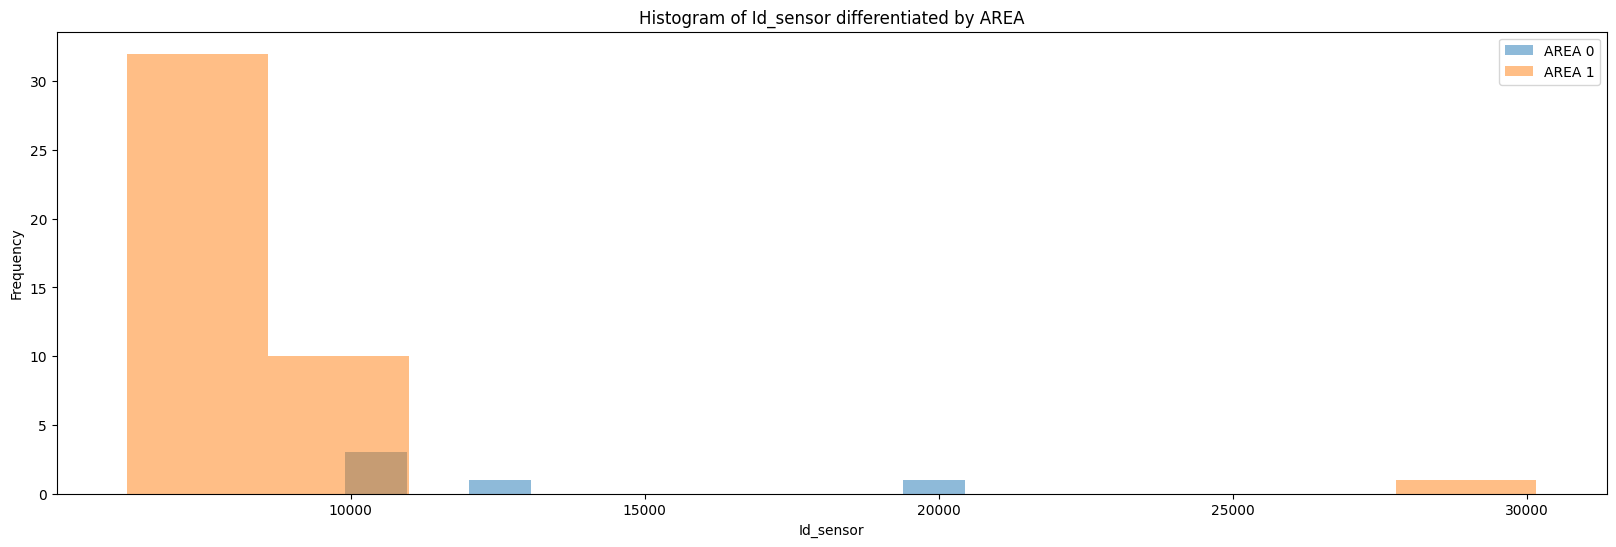

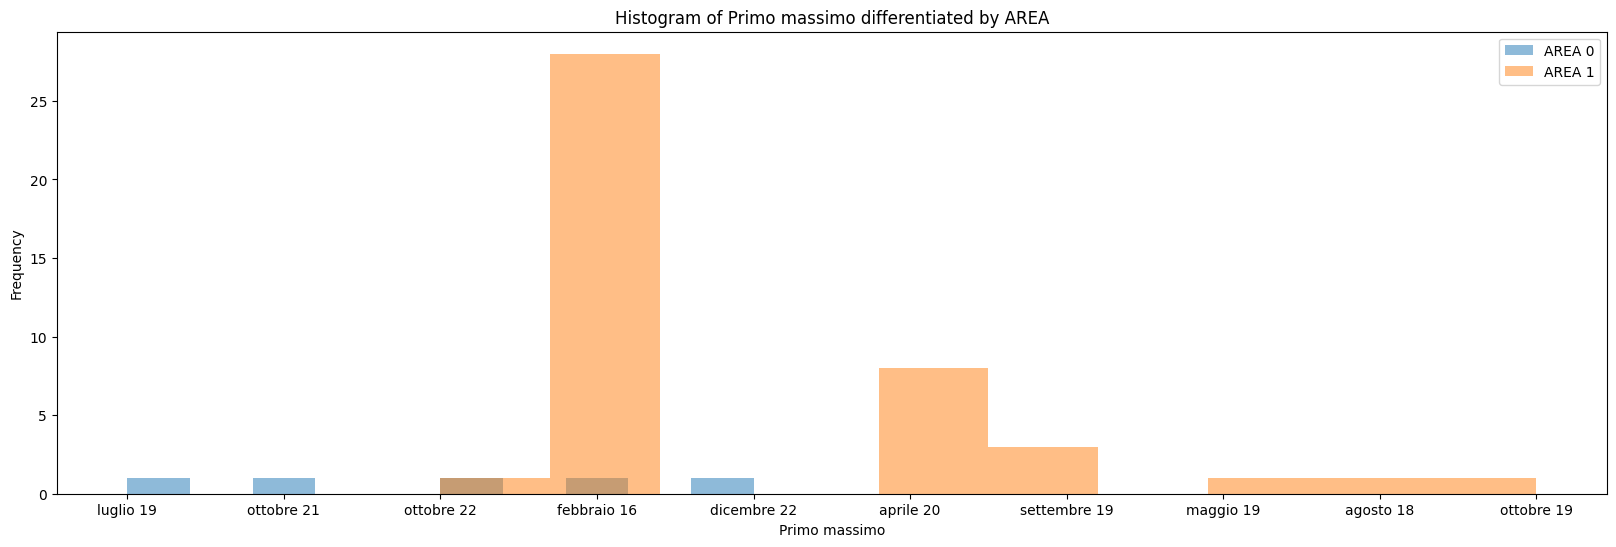

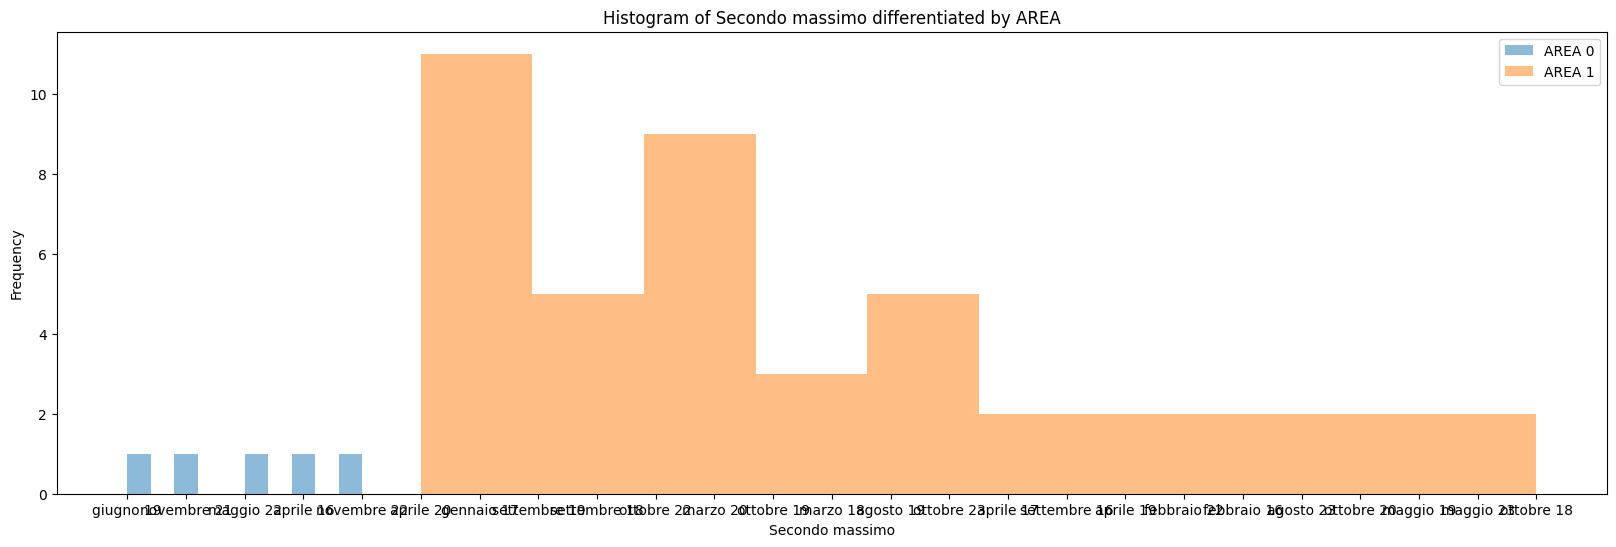

In [3]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'AREA'
grouped_by_area = df.groupby('AREA')

# Plot histograms for each column
for column in df.columns:
    if column != 'AREA':
        plt.figure(figsize=(20, 6))
        for area, group in grouped_by_area:
            plt.hist(group[column], alpha=0.5, label=f'AREA {area}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column} differentiated by AREA')
        plt.legend()
        plt.show()


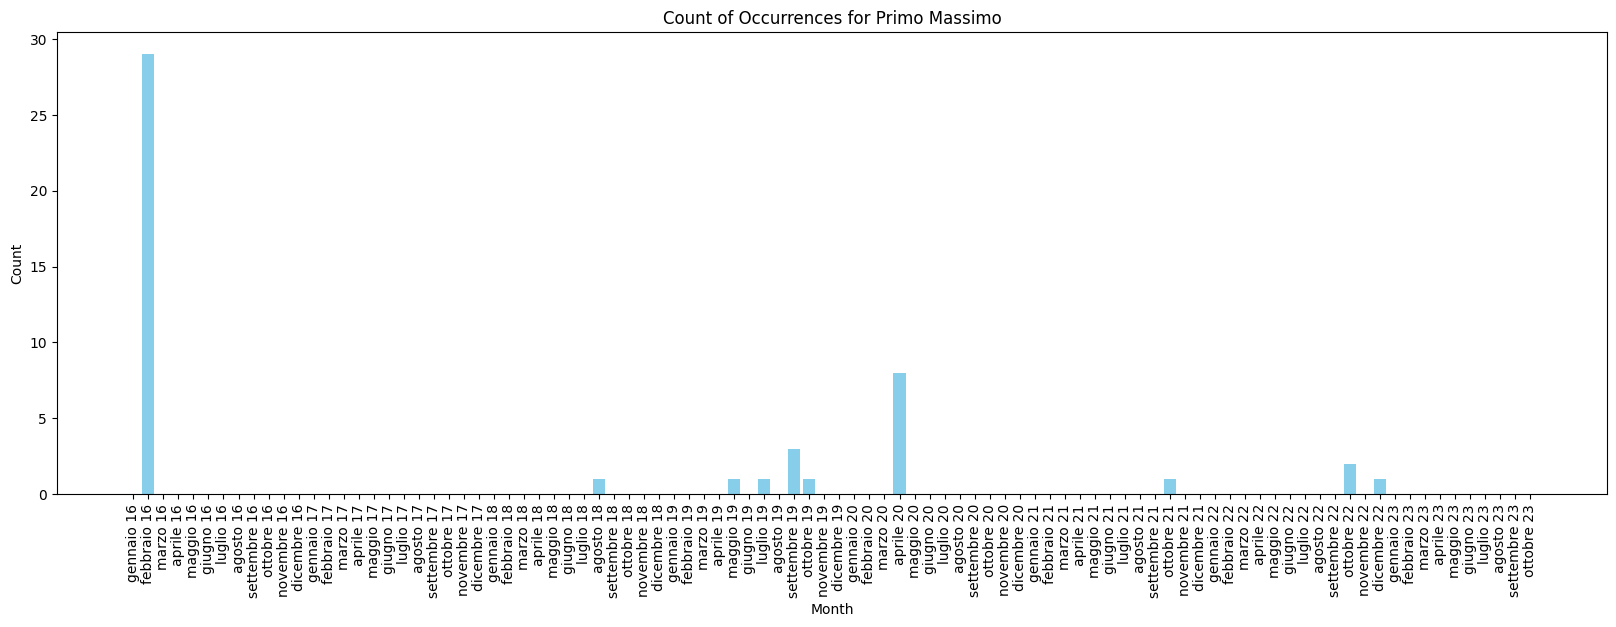

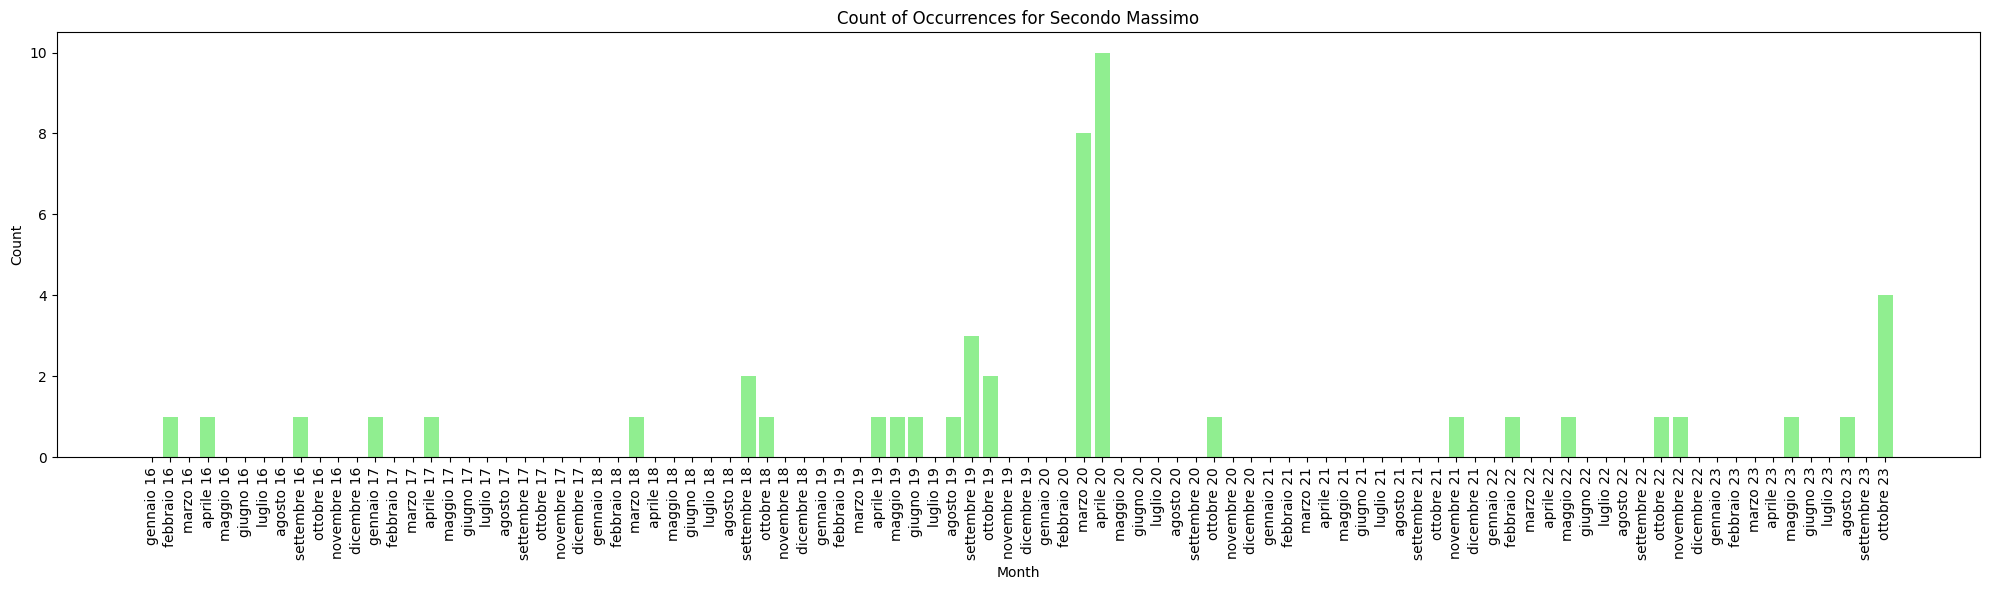

In [15]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of months
month_order = [
    'gennaio 16', 'febbraio 16', 'marzo 16', 'aprile 16', 'maggio 16', 'giugno 16', 'luglio 16', 'agosto 16',
    'settembre 16', 'ottobre 16', 'novembre 16', 'dicembre 16', 'gennaio 17', 'febbraio 17', 'marzo 17',
    'aprile 17', 'maggio 17', 'giugno 17', 'luglio 17', 'agosto 17', 'settembre 17', 'ottobre 17', 'novembre 17',
    'dicembre 17', 'gennaio 18', 'febbraio 18', 'marzo 18', 'aprile 18', 'maggio 18', 'giugno 18', 'luglio 18',
    'agosto 18', 'settembre 18', 'ottobre 18', 'novembre 18', 'dicembre 18', 'gennaio 19', 'febbraio 19', 'marzo 19',
    'aprile 19', 'maggio 19', 'giugno 19', 'luglio 19', 'agosto 19', 'settembre 19', 'ottobre 19', 'novembre 19',
    'dicembre 19', 'gennaio 20', 'febbraio 20', 'marzo 20', 'aprile 20', 'maggio 20', 'giugno 20', 'luglio 20',
    'agosto 20', 'settembre 20', 'ottobre 20', 'novembre 20', 'dicembre 20', 'gennaio 21', 'febbraio 21', 'marzo 21',
    'aprile 21', 'maggio 21', 'giugno 21', 'luglio 21', 'agosto 21', 'settembre 21', 'ottobre 21', 'novembre 21',
    'dicembre 21', 'gennaio 22', 'febbraio 22', 'marzo 22', 'aprile 22', 'maggio 22', 'giugno 22', 'luglio 22',
    'agosto 22', 'settembre 22', 'ottobre 22', 'novembre 22', 'dicembre 22', 'gennaio 23', 'febbraio 23', 'marzo 23',
    'aprile 23', 'maggio 23', 'giugno 23', 'luglio 23', 'agosto 23', 'settembre 23', 'ottobre 23'
]

# Initialize Counters for 'Primo massimo' and 'Secondo massimo'
primo_massimo_counter = Counter()
secondo_massimo_counter = Counter()

# Iterate through the DataFrame
for index, row in df.iterrows():
    primo_massimo_counter[row['Primo massimo']] += 1
    secondo_massimo_counter[row['Secondo massimo']] += 1

# Convert the Counter objects to dictionaries
primo_massimo_dict = dict(primo_massimo_counter)
secondo_massimo_dict = dict(secondo_massimo_counter)

# Create DataFrames from the dictionaries
primo_massimo_df = pd.DataFrame(list(primo_massimo_dict.items()), columns=['Month', 'Count'])
secondo_massimo_df = pd.DataFrame(list(secondo_massimo_dict.items()), columns=['Month', 'Count'])

# Set the 'Month' column as the index
primo_massimo_df.set_index('Month', inplace=True)
secondo_massimo_df.set_index('Month', inplace=True)

# Reindex to include all months in the specified order
primo_massimo_df = primo_massimo_df.reindex(month_order)
secondo_massimo_df = secondo_massimo_df.reindex(month_order)

# Fill NaN values with 0
primo_massimo_df.fillna(0, inplace=True)
secondo_massimo_df.fillna(0, inplace=True)

# Plot the histograms
plt.figure(figsize=(20, 6))
plt.bar(primo_massimo_df.index, primo_massimo_df['Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Occurrences for Primo Massimo')
plt.xticks(rotation=90)

plt.figure(figsize=(20, 6))
plt.bar(secondo_massimo_df.index, secondo_massimo_df['Count'], color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Occurrences for Secondo Massimo')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
